In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
def step_key(file_name):
    return int(file_name.split('_')[1])

## Getting file names

In [3]:
N=2000
F=0.0001
loc="/data/kabir/output/SOC_model/data_f"+str(F)+"N"+str(N)+"/" #180519_
files=os.listdir(loc)
files.remove("avalanche_sizes.pkl")
for file in files:
    if "time" in file:
        time_file=file
#print(time_file)
files.remove(time_file)
files=sorted(files,key=step_key)
print(files)

['step_0_data.pkl', 'step_10_data.pkl', 'step_20_data.pkl', 'step_30_data.pkl', 'step_40_data.pkl', 'step_50_data.pkl', 'step_60_data.pkl', 'step_70_data.pkl', 'step_80_data.pkl', 'step_90_data.pkl', 'step_100_data.pkl', 'step_110_data.pkl', 'step_120_data.pkl', 'step_130_data.pkl', 'step_140_data.pkl', 'step_150_data.pkl', 'step_160_data.pkl', 'step_170_data.pkl', 'step_180_data.pkl', 'step_190_data.pkl', 'step_200_data.pkl', 'step_210_data.pkl', 'step_220_data.pkl', 'step_230_data.pkl', 'step_240_data.pkl', 'step_250_data.pkl', 'step_260_data.pkl', 'step_270_data.pkl', 'step_280_data.pkl', 'step_290_data.pkl', 'step_300_data.pkl', 'step_310_data.pkl', 'step_320_data.pkl', 'step_330_data.pkl', 'step_340_data.pkl', 'step_350_data.pkl', 'step_360_data.pkl', 'step_370_data.pkl', 'step_380_data.pkl', 'step_390_data.pkl', 'step_400_data.pkl', 'step_410_data.pkl', 'step_420_data.pkl', 'step_430_data.pkl', 'step_440_data.pkl', 'step_450_data.pkl', 'step_460_data.pkl', 'step_470_data.pkl', 's

## Loading steps data from files

In [4]:
steps=[]
data=[]
for file in files:
    path=loc+file
    #print(file)
    with open(path,'rb') as pickle_file:
        u = pkl._Unpickler(pickle_file)
        u.encoding = 'latin1'
        data.append(u.load())
    steps.append(step_key(file))

    
with open(loc+'avalanche_sizes.pkl','rb') as pickle_file:
        u = pkl._Unpickler(pickle_file)
        u.encoding = 'latin1'
        avalanche_sizes=u.load()

In [184]:
data[0]

{'A': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'dist': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  [33, 149, 329, 387, 334, 341, 202, 115, 63, 31, 9, 5, 2]]}

In [181]:
len(data)

190

## Plotting final degree distribution

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189


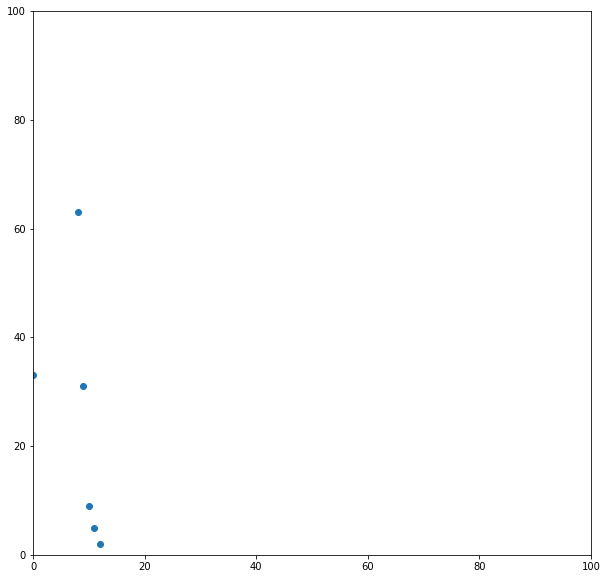

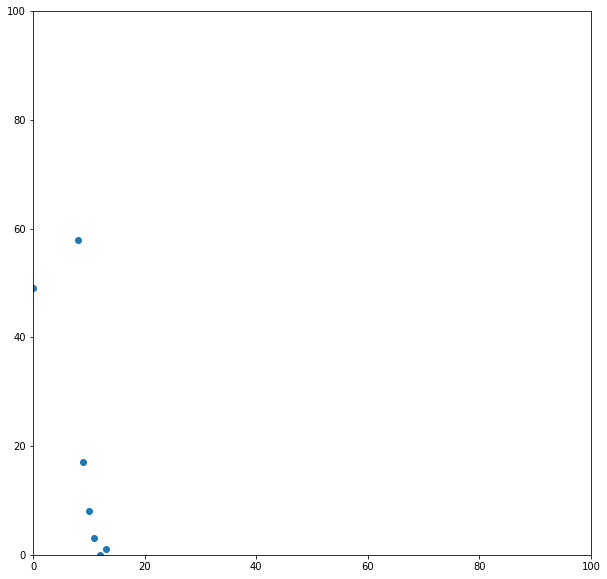

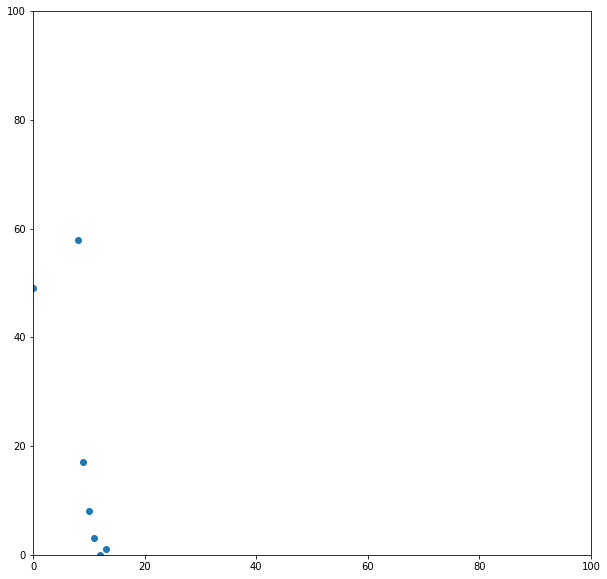

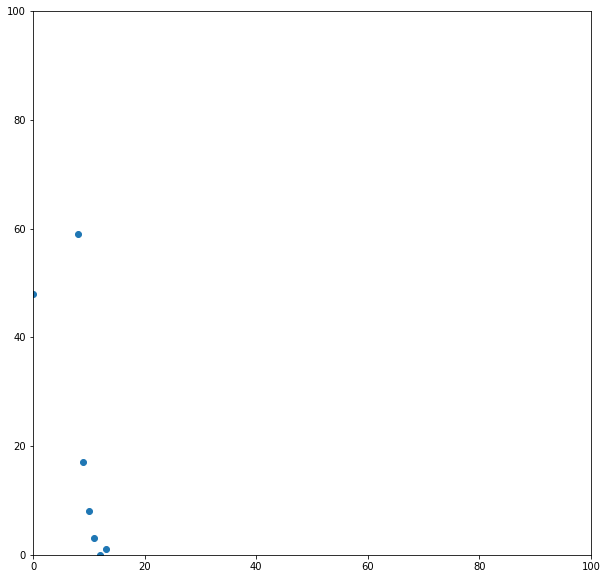

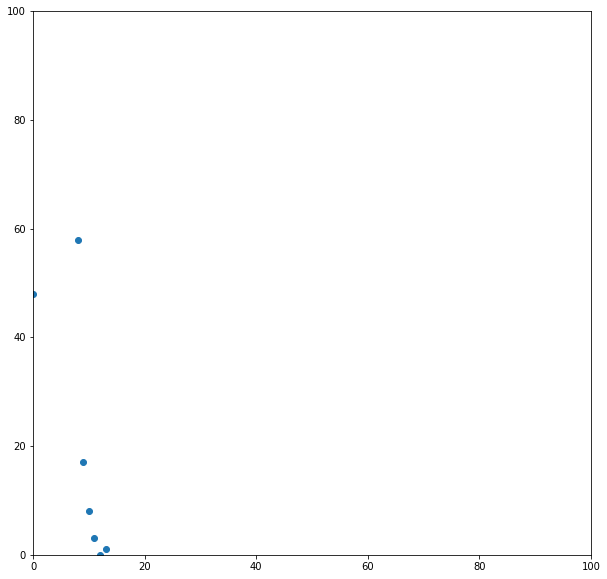

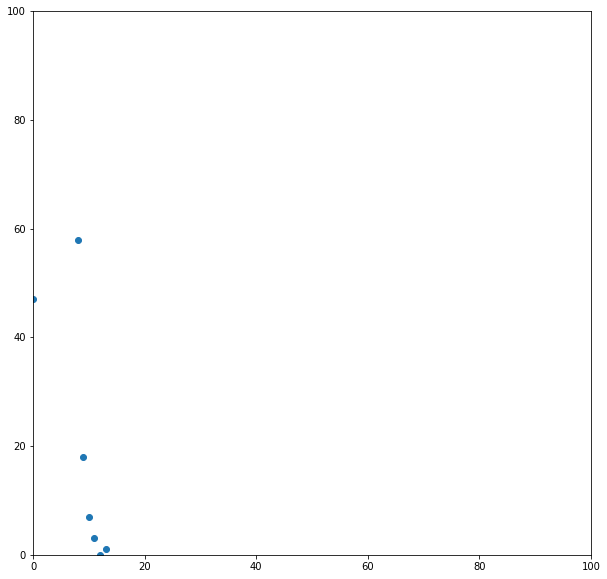

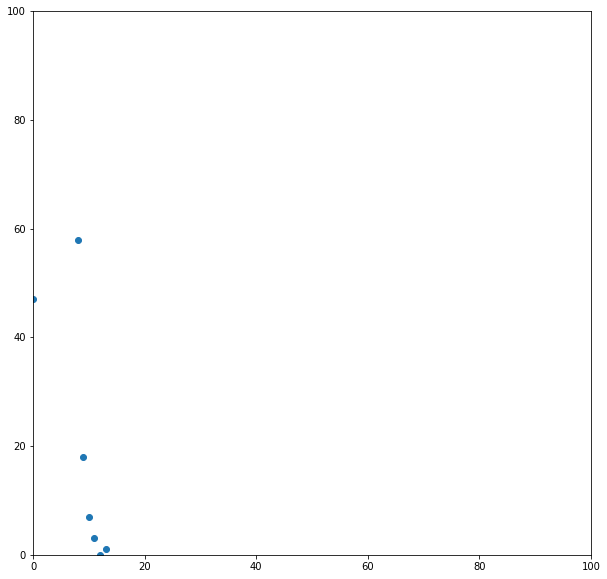

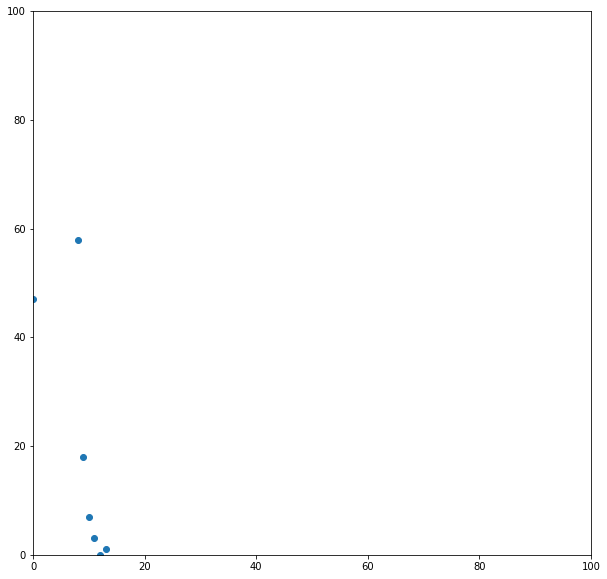

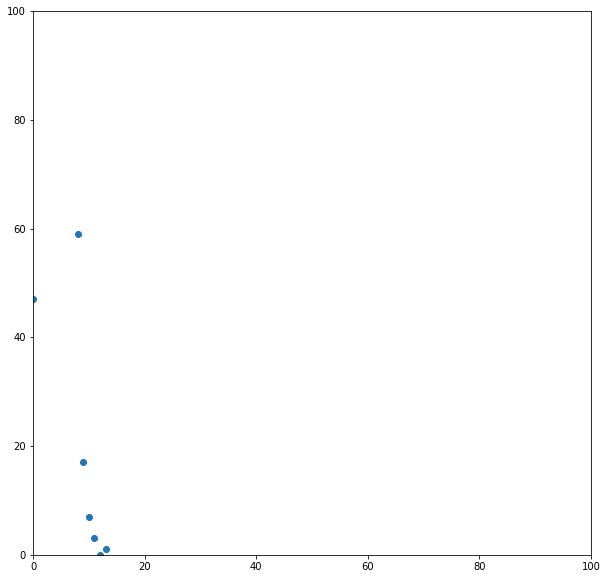

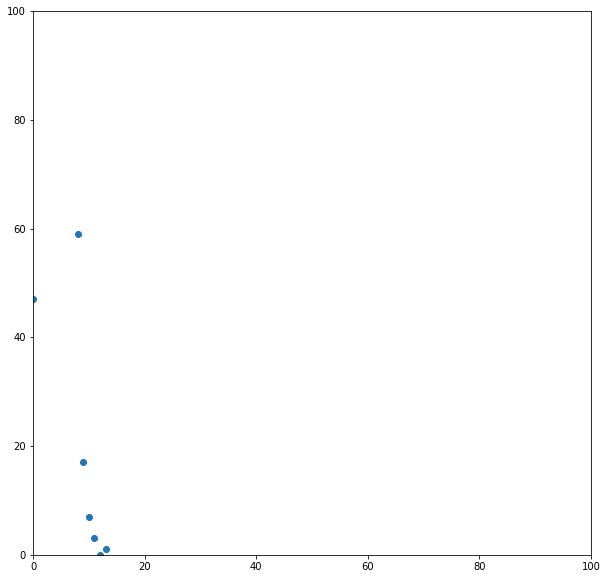

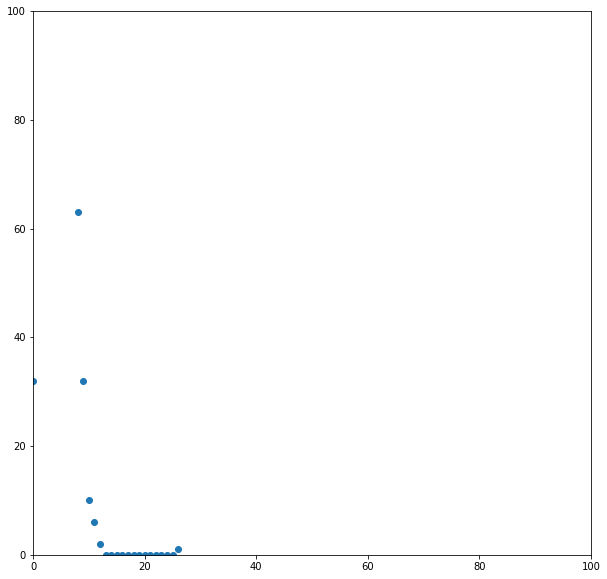

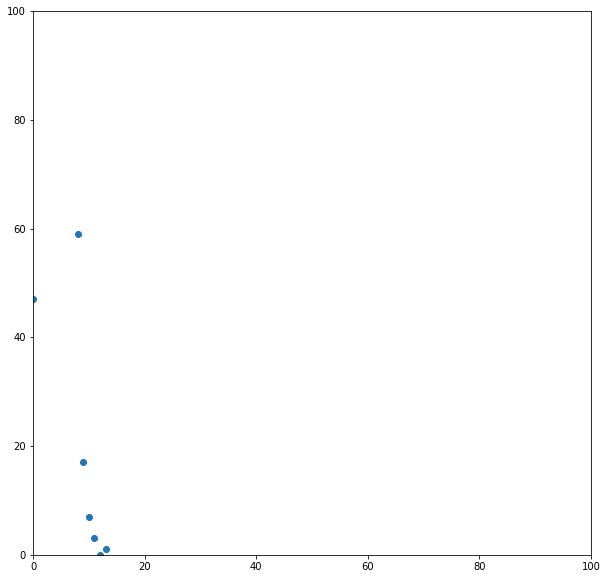

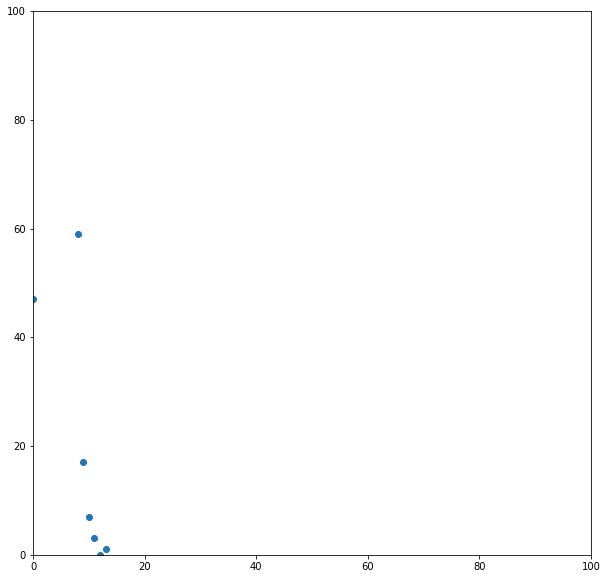

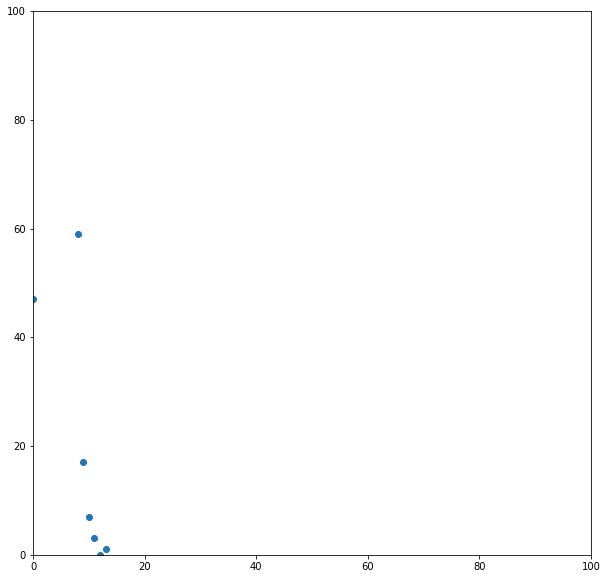

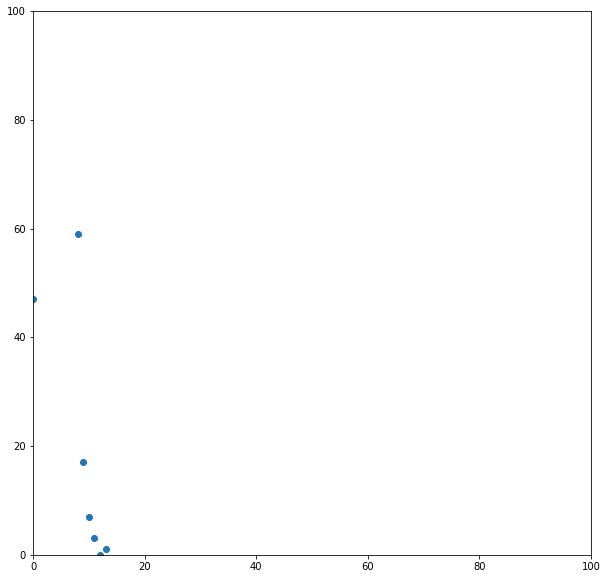

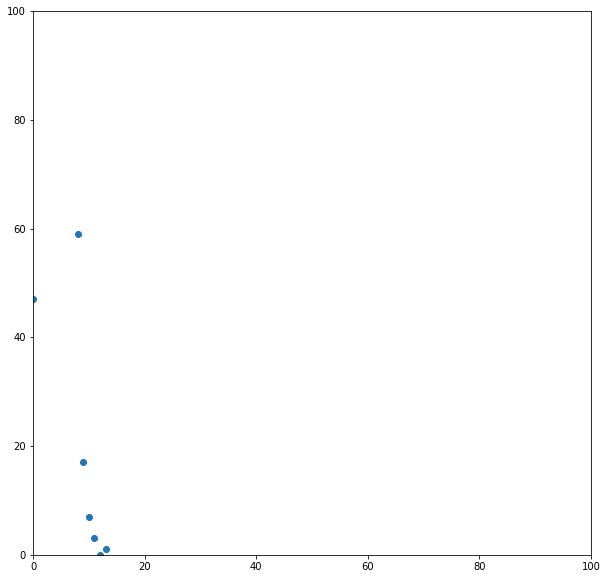

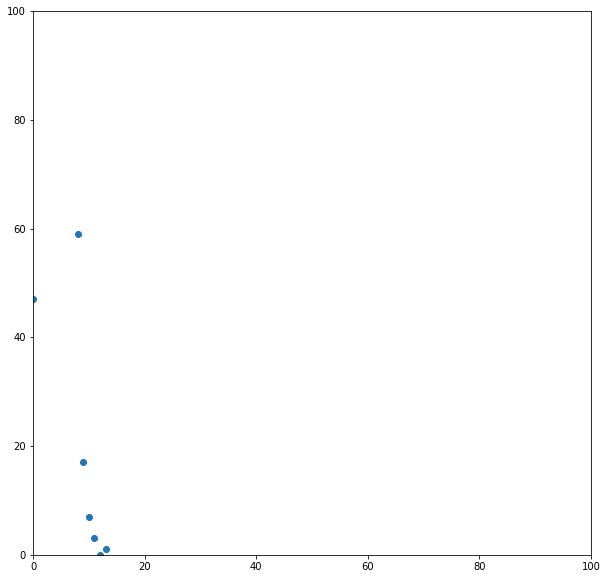

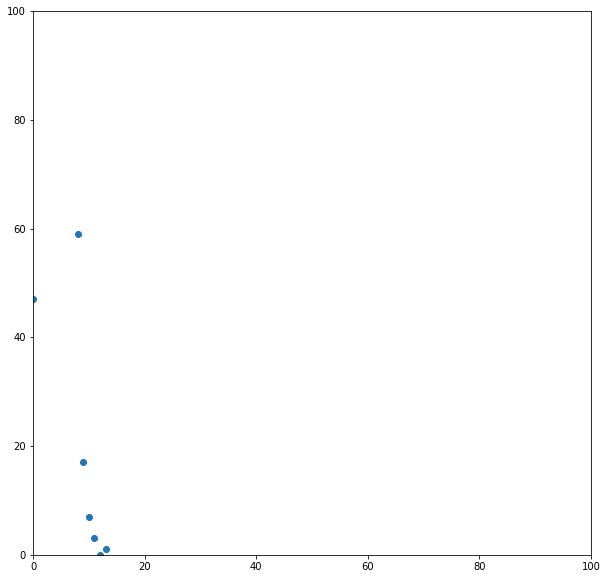

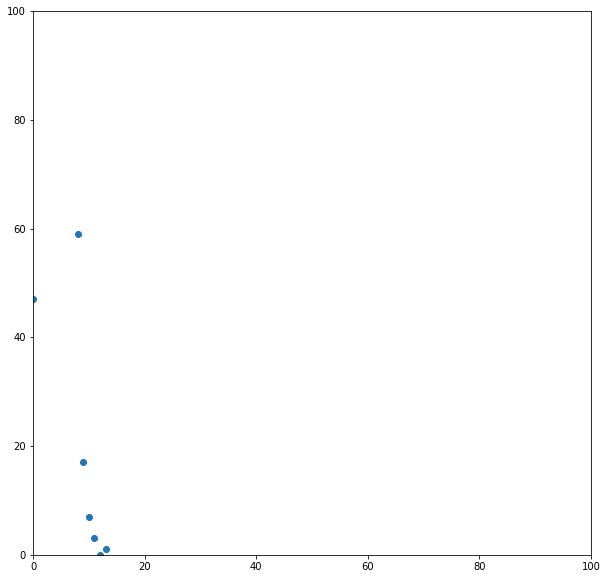

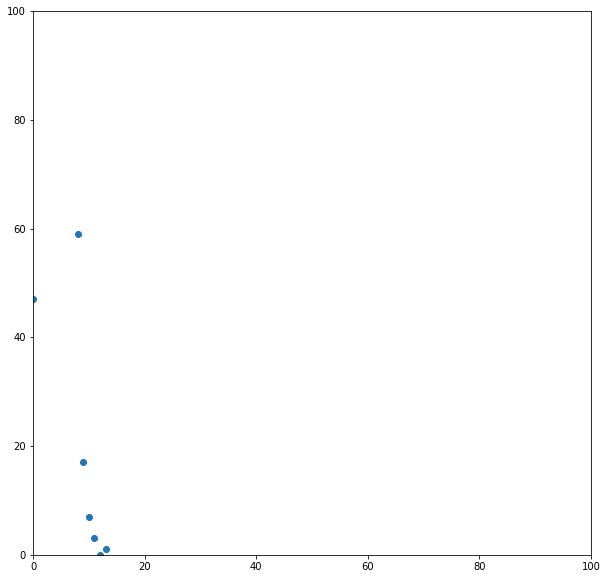

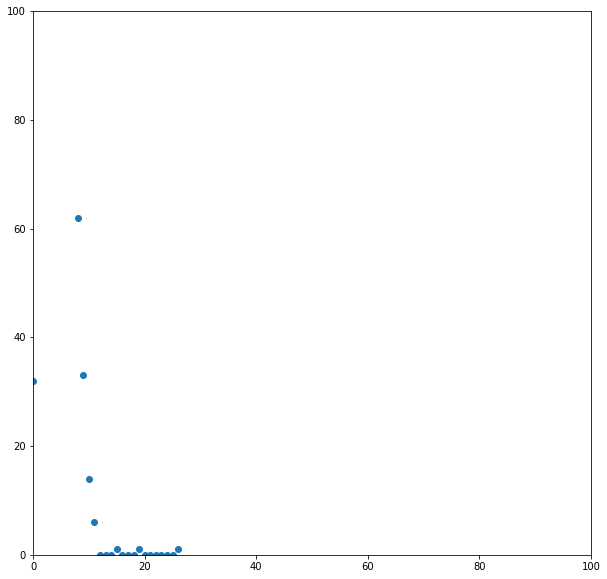

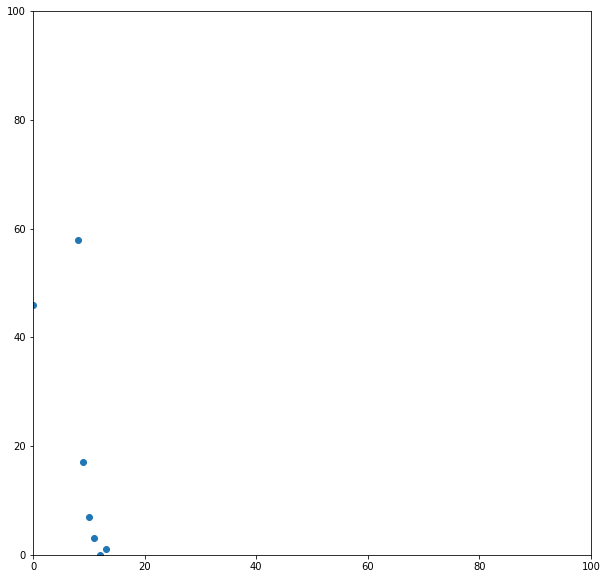

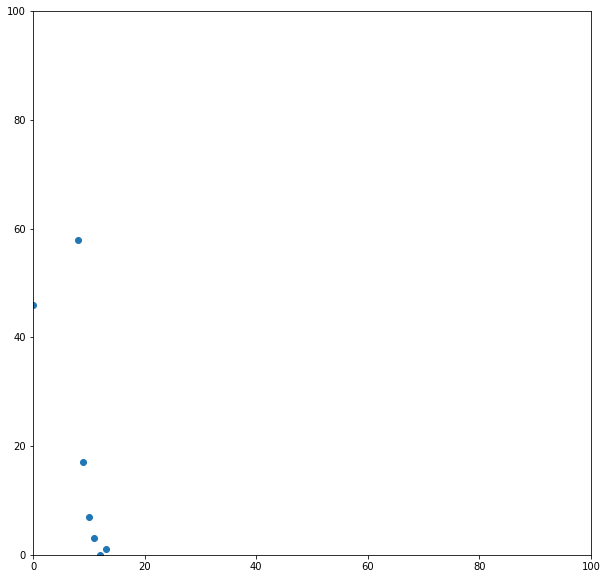

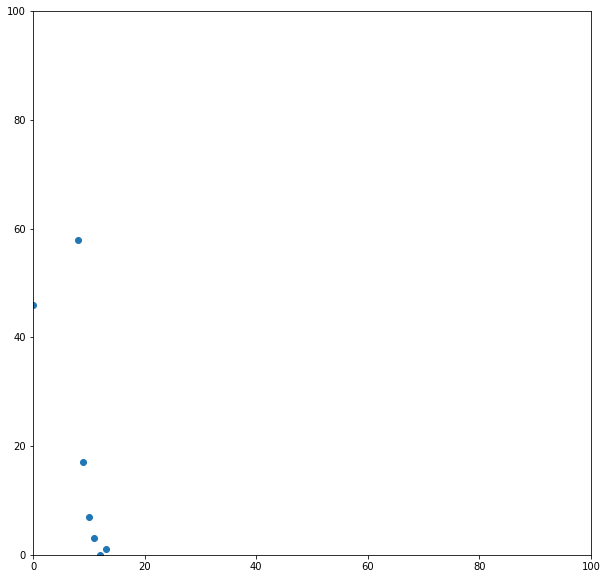

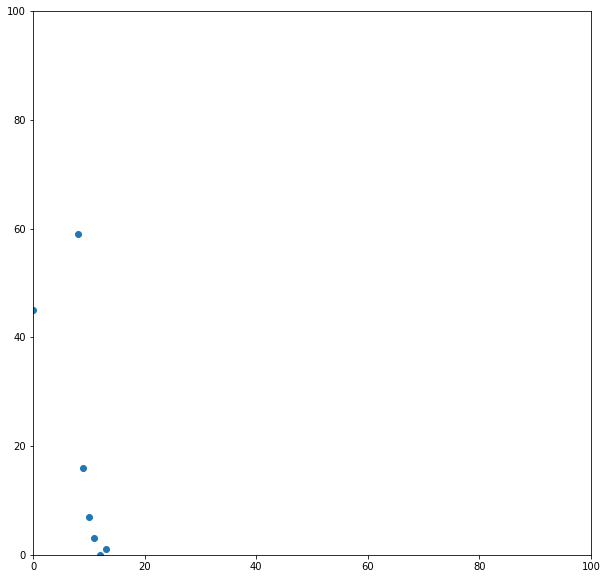

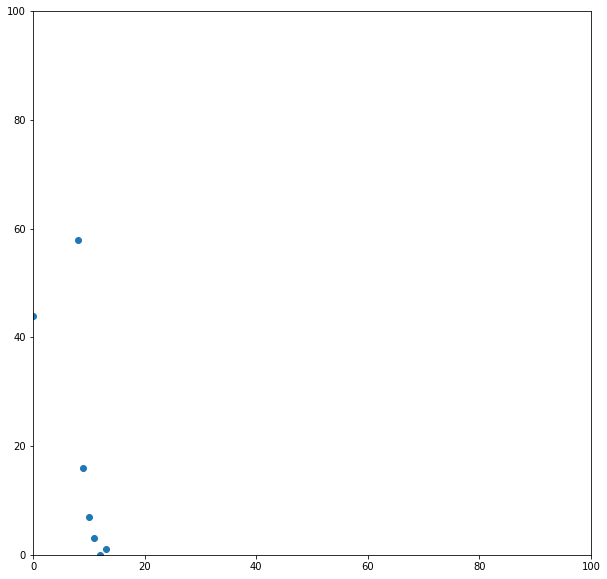

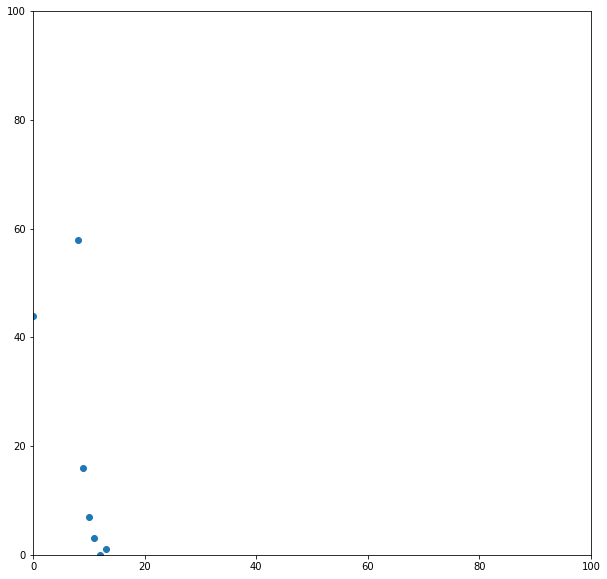

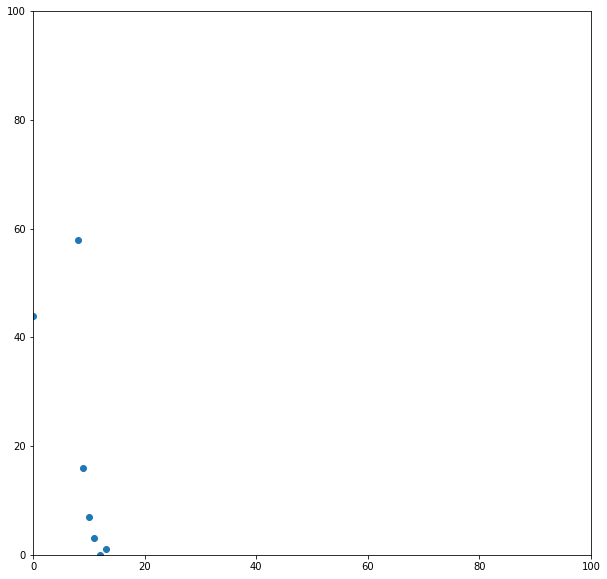

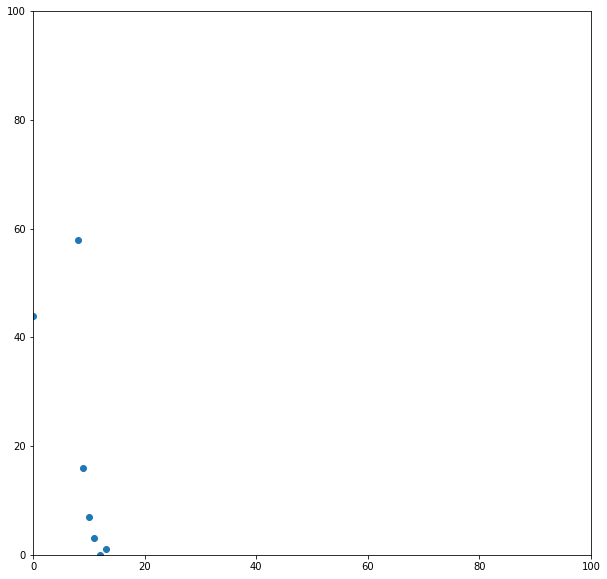

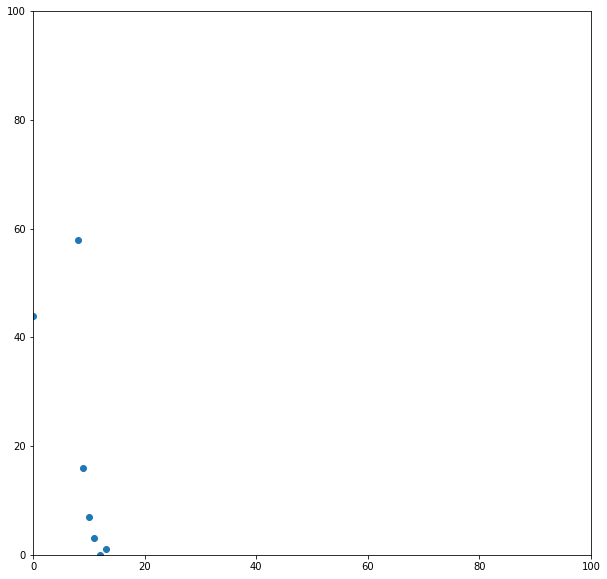

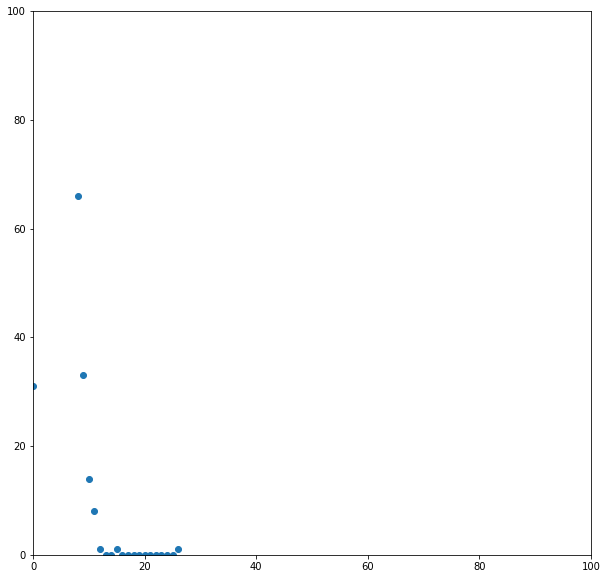

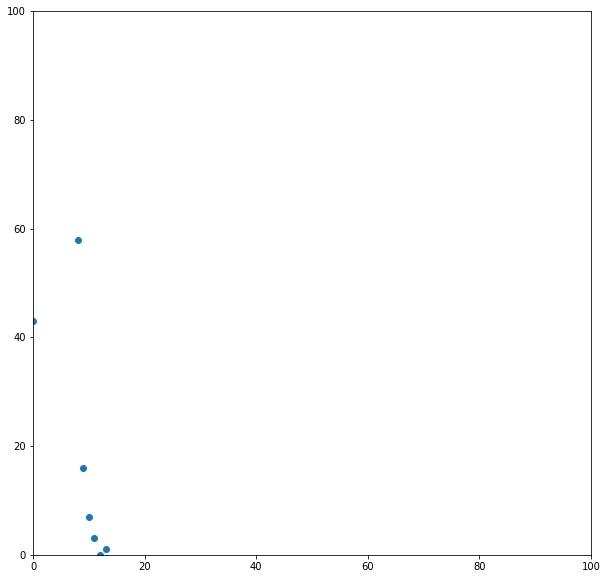

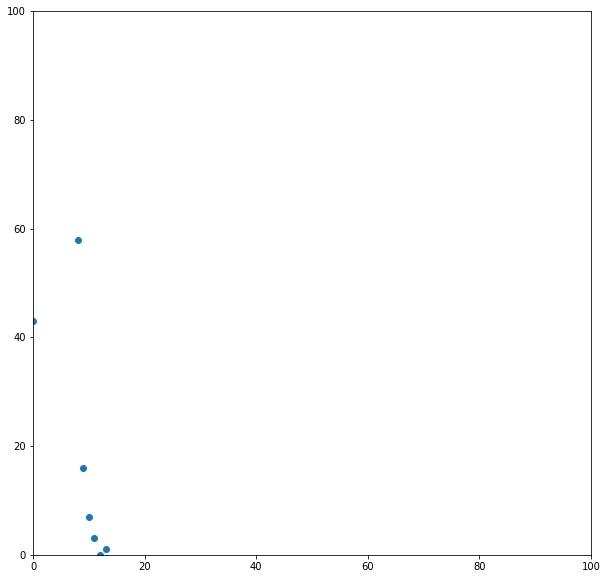

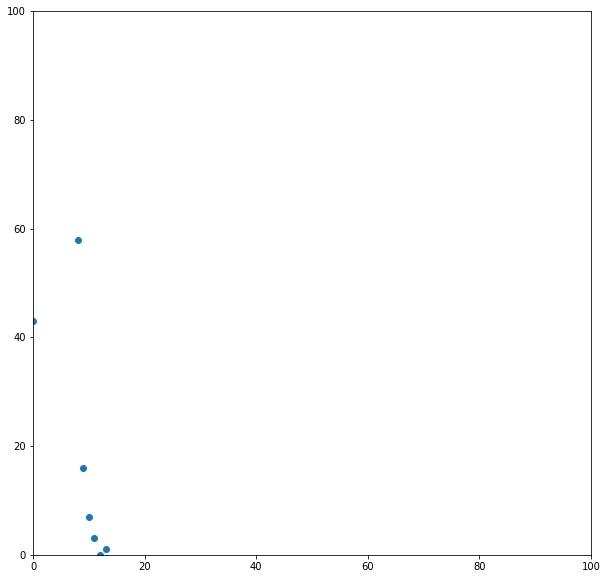

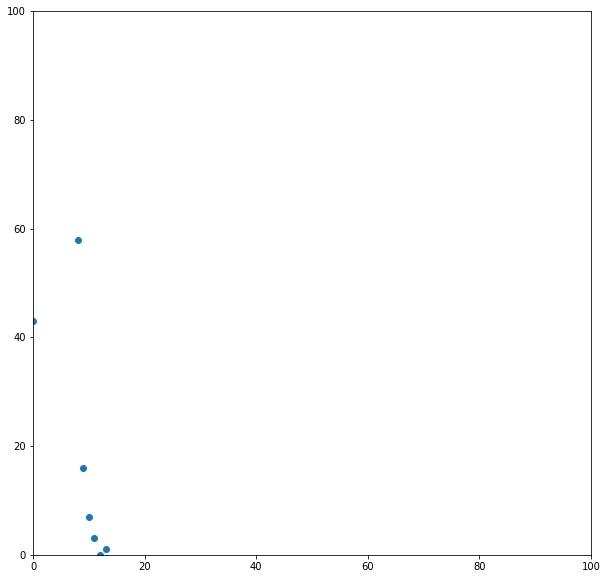

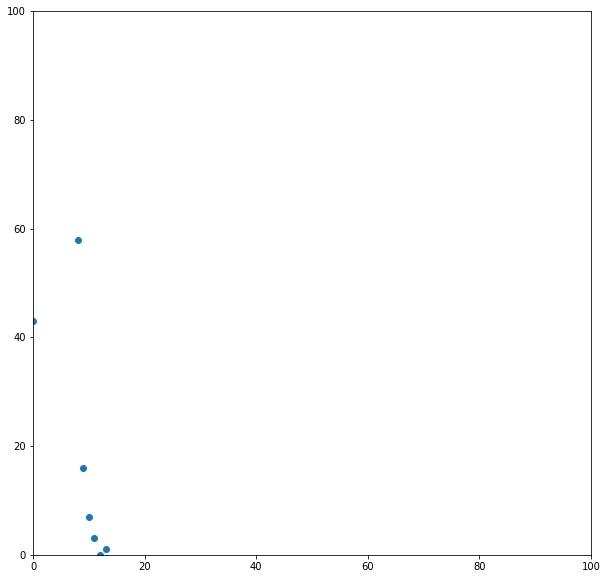

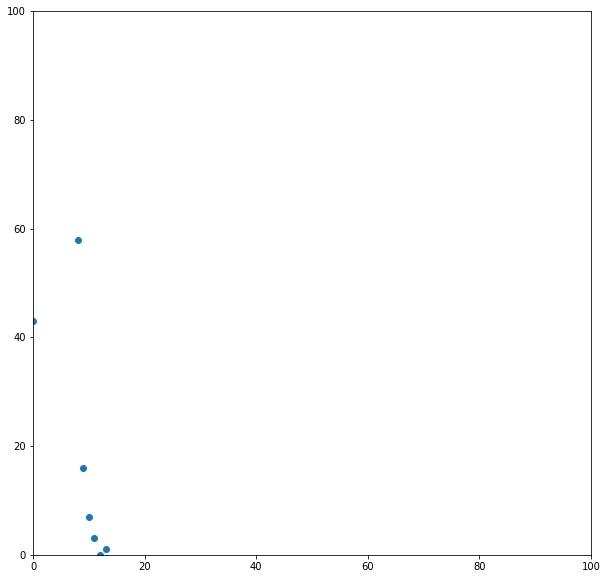

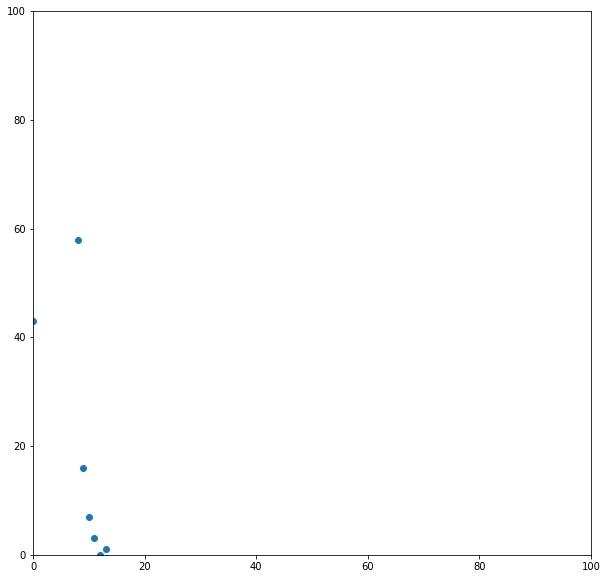

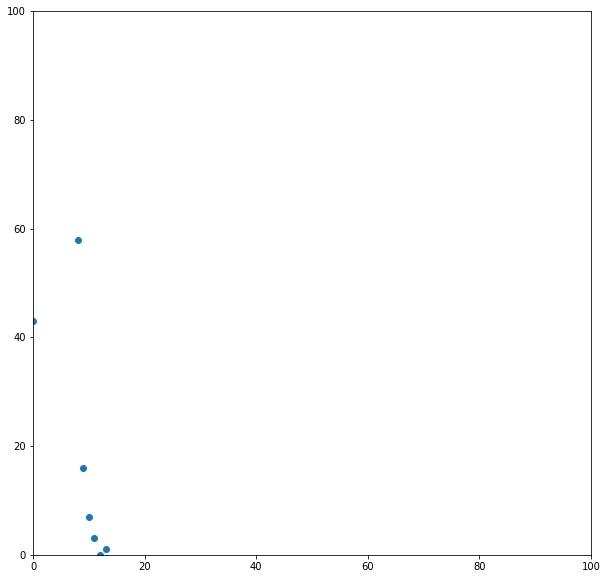

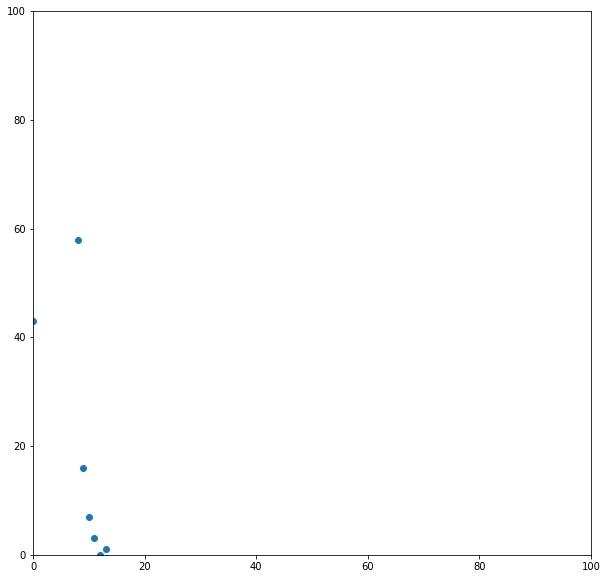

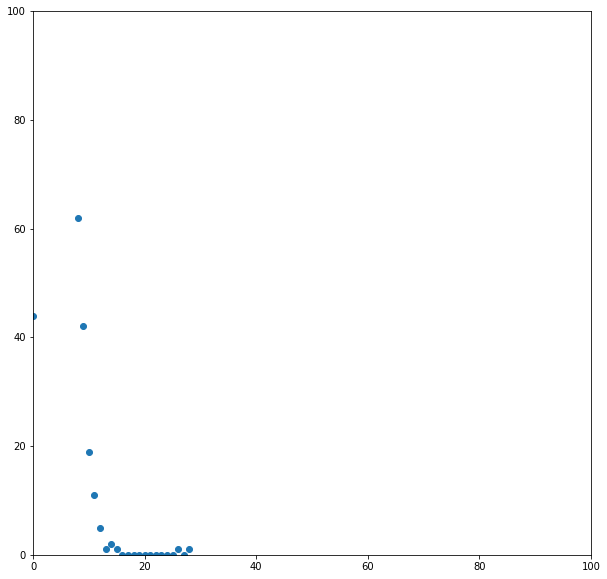

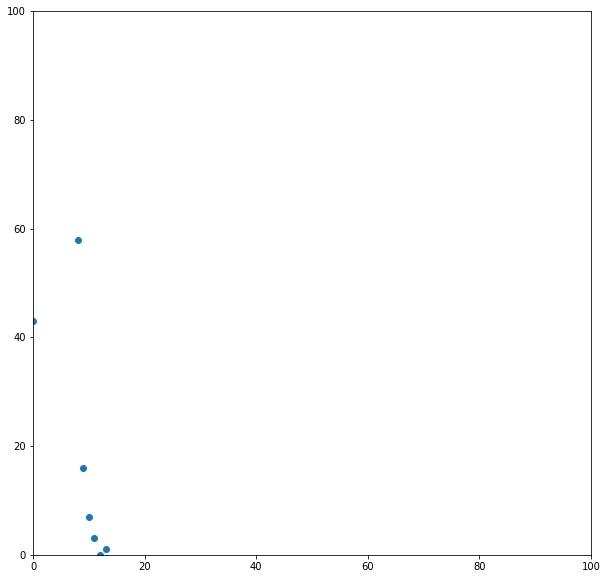

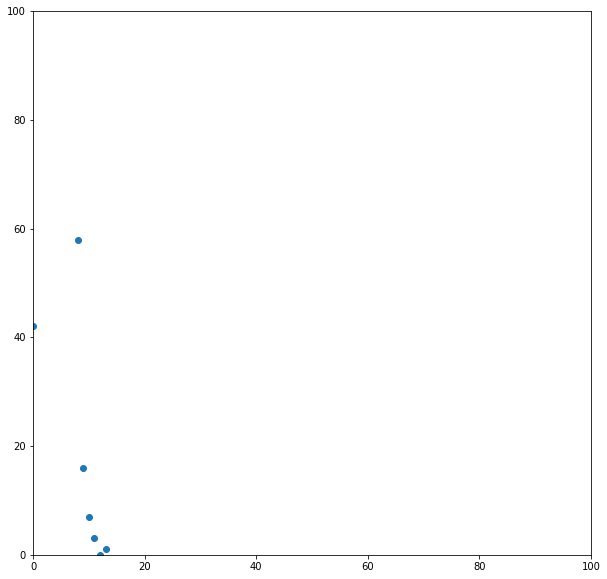

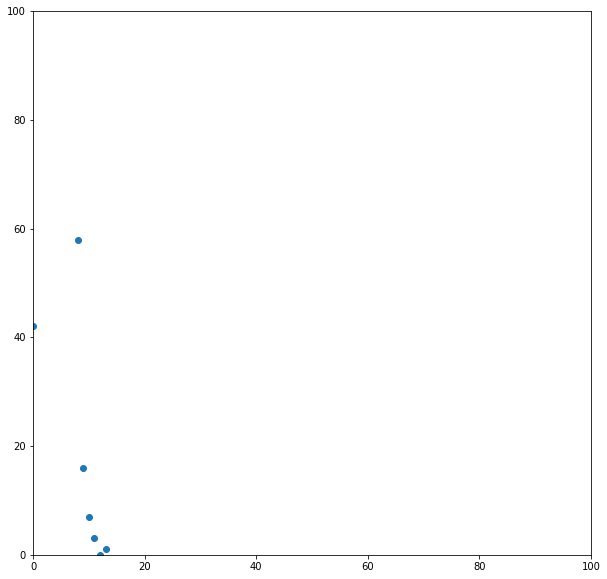

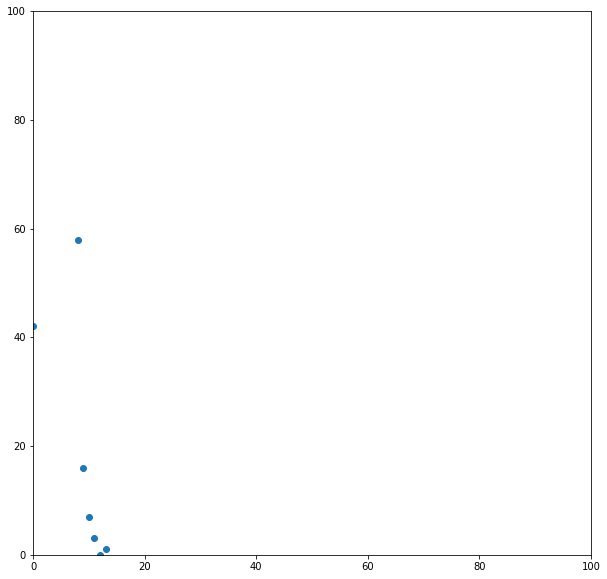

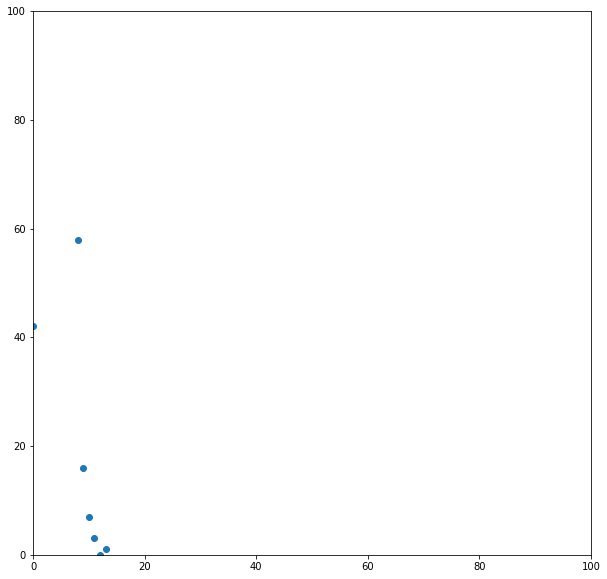

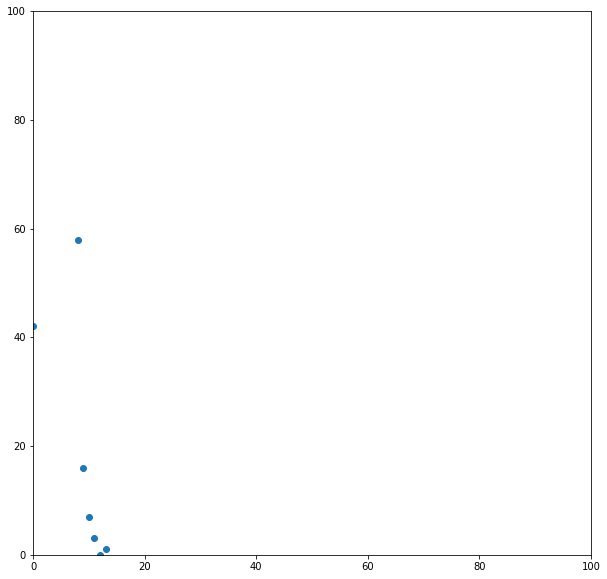

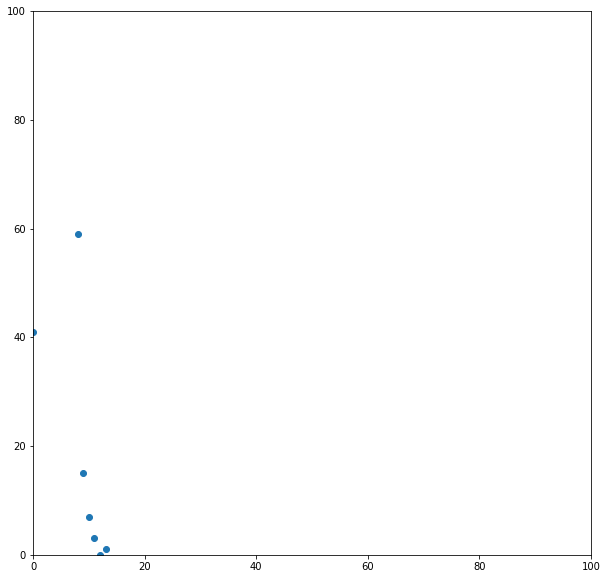

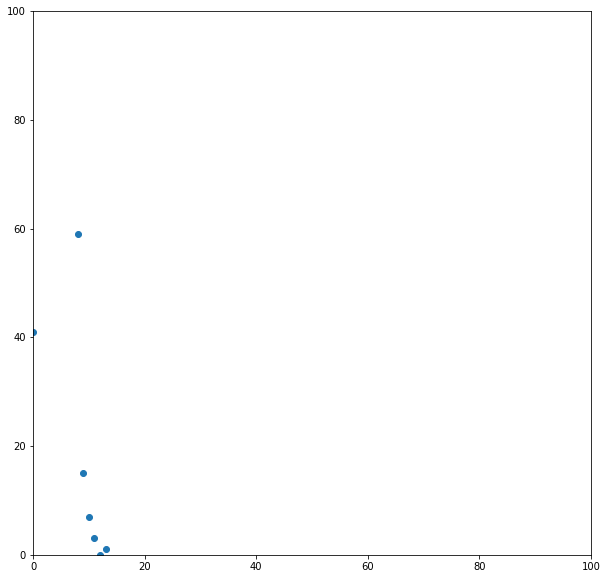

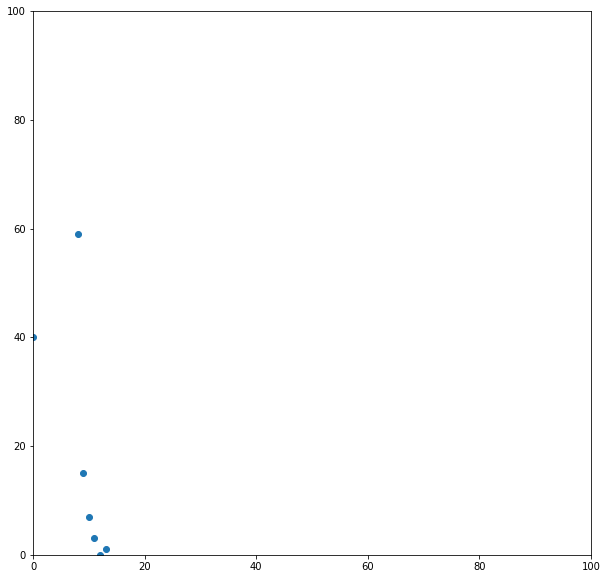

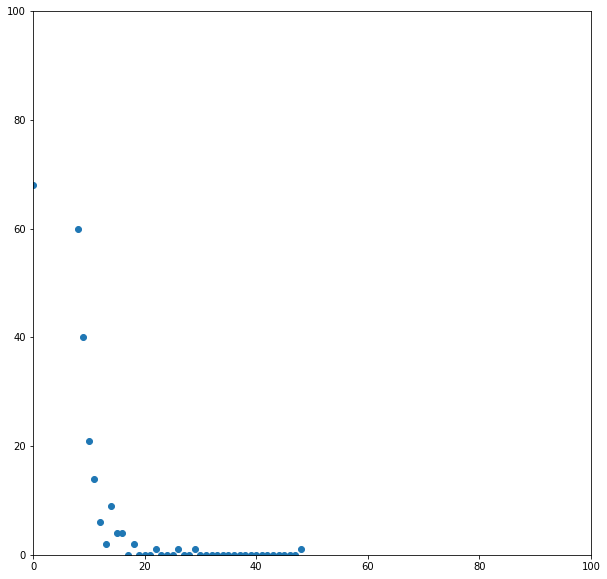

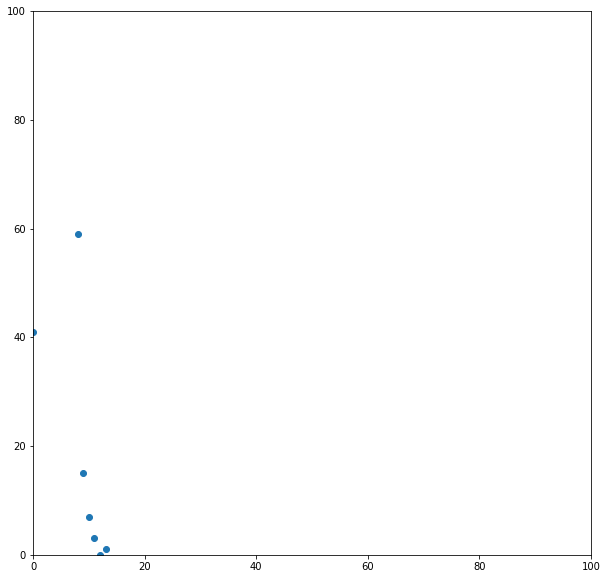

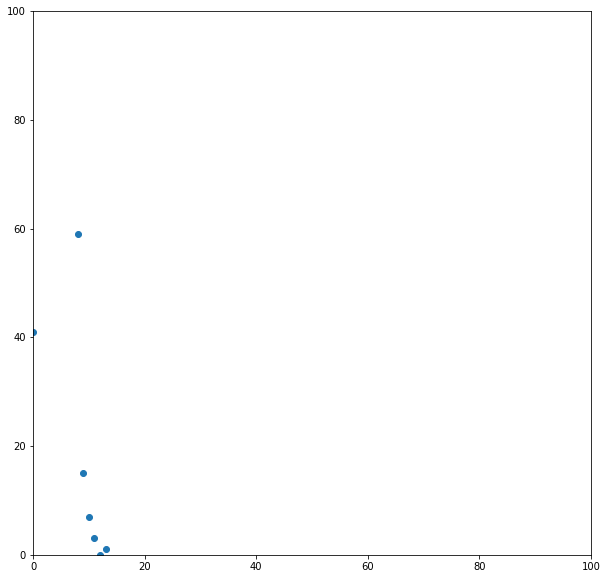

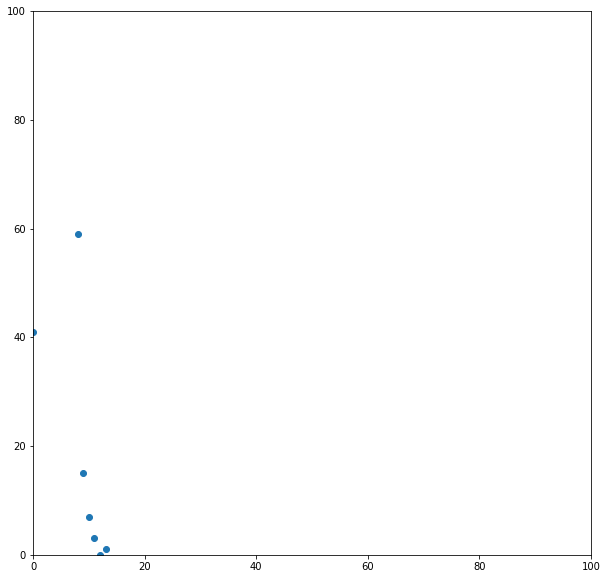

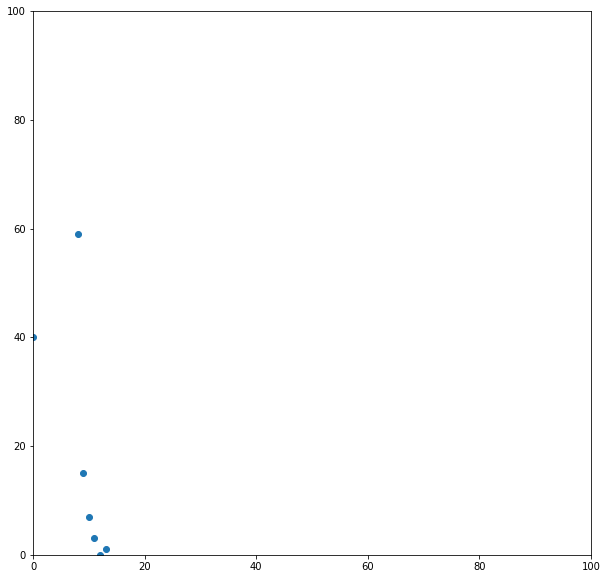

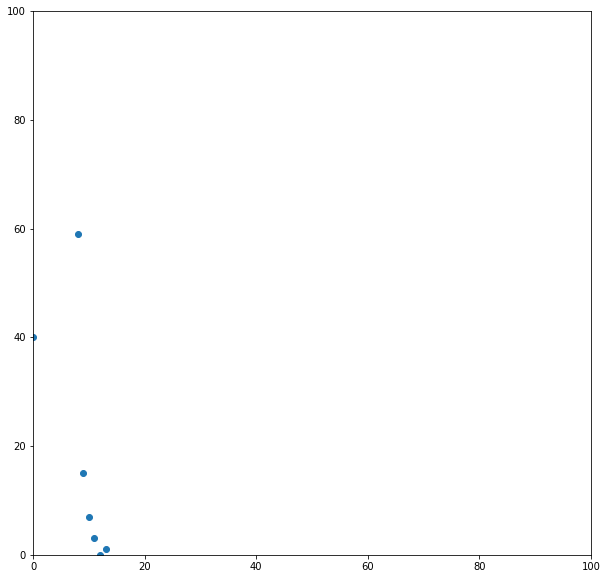

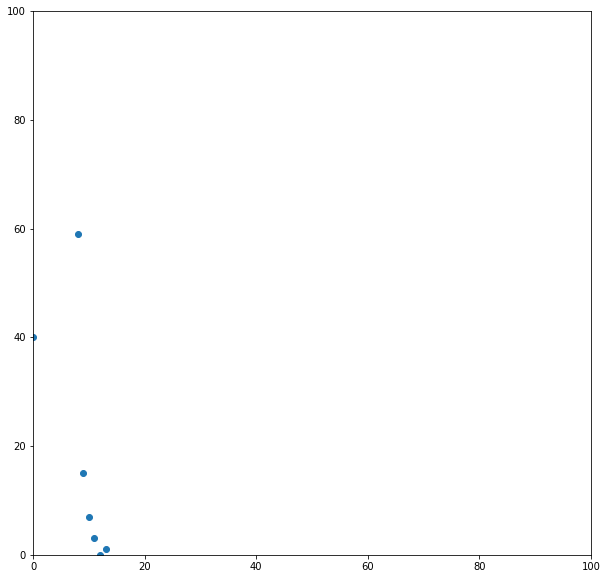

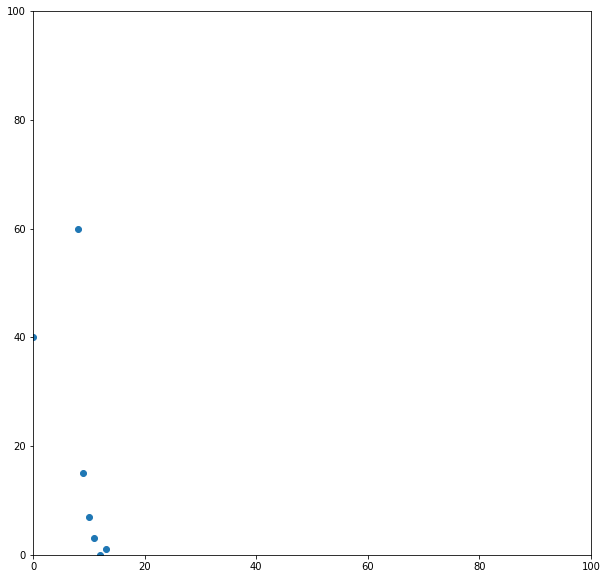

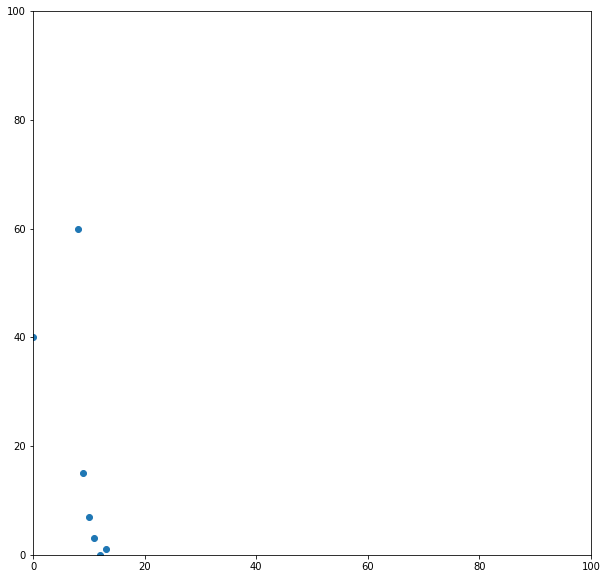

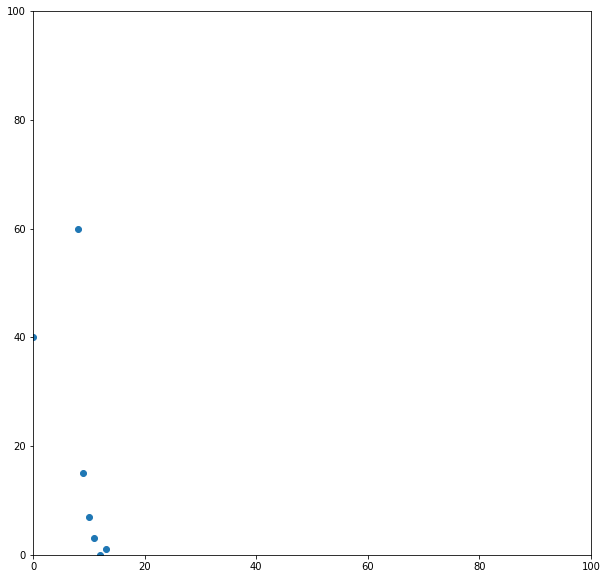

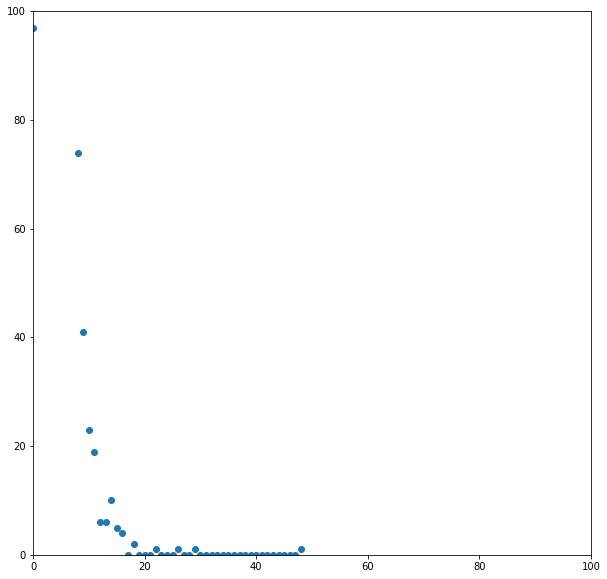

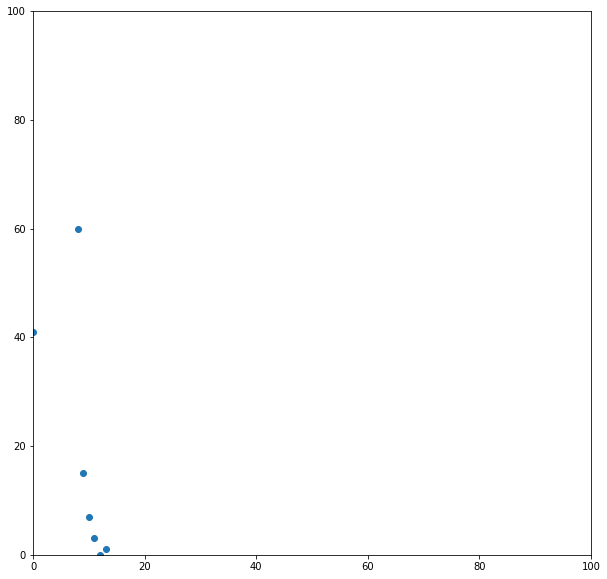

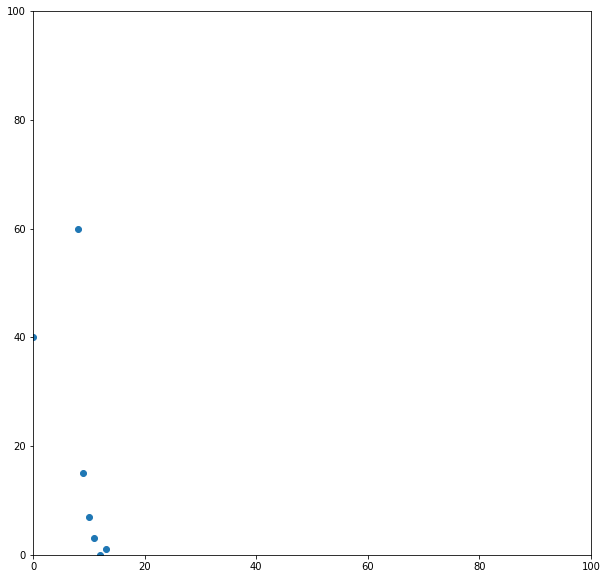

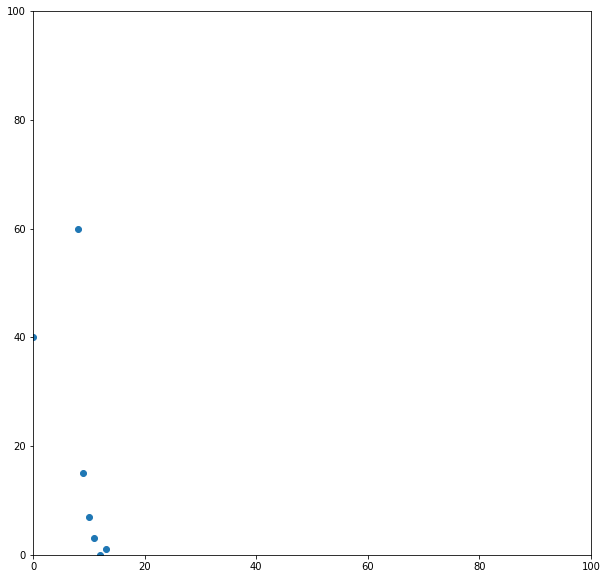

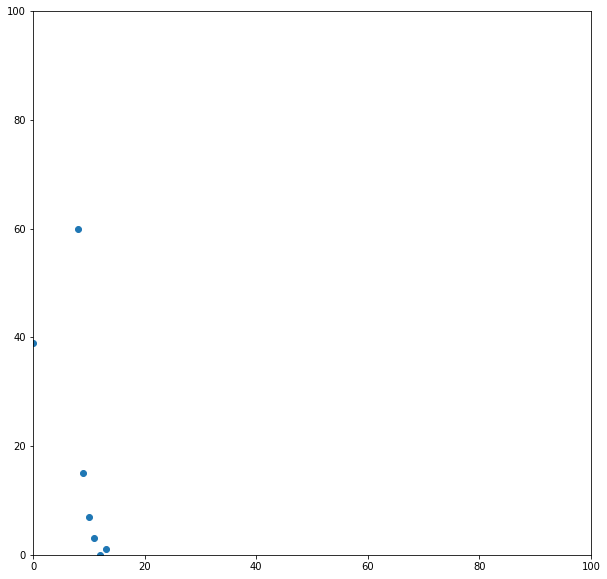

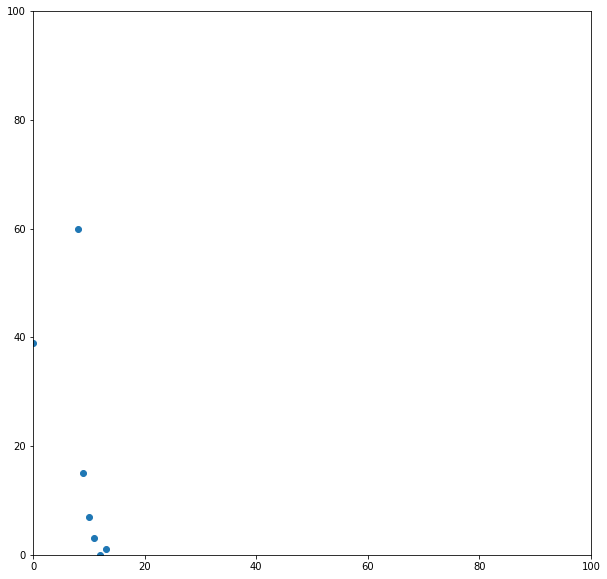

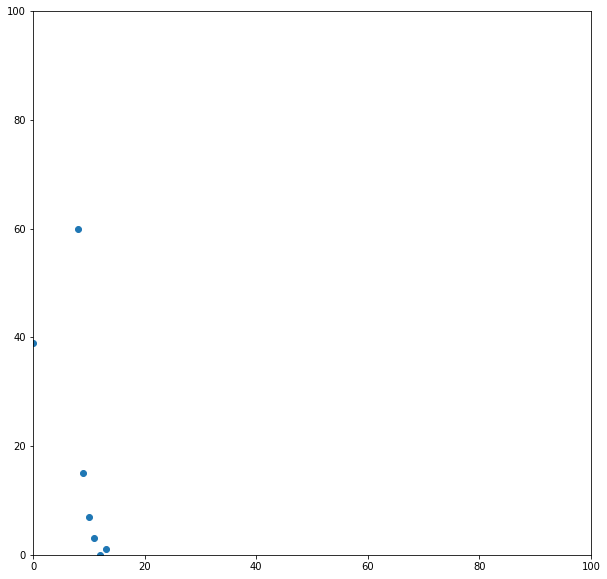

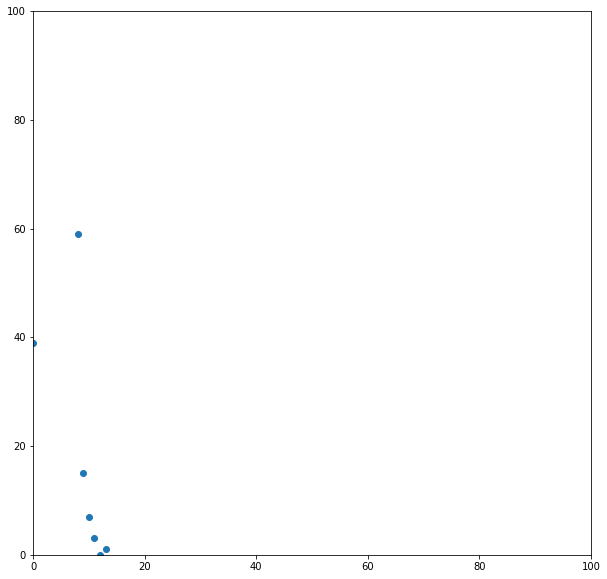

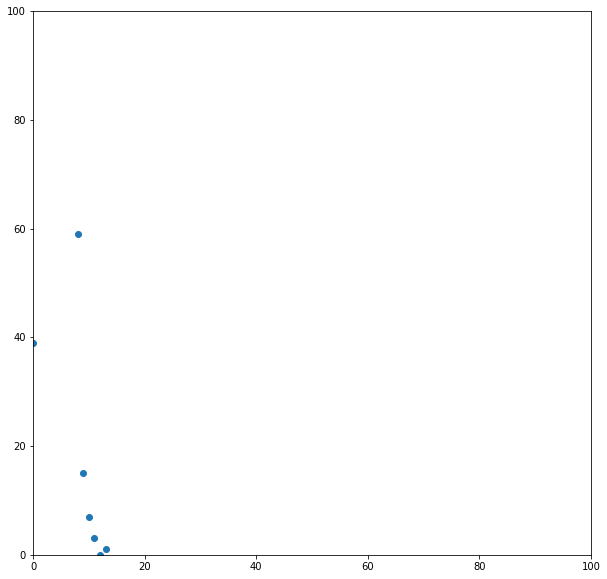

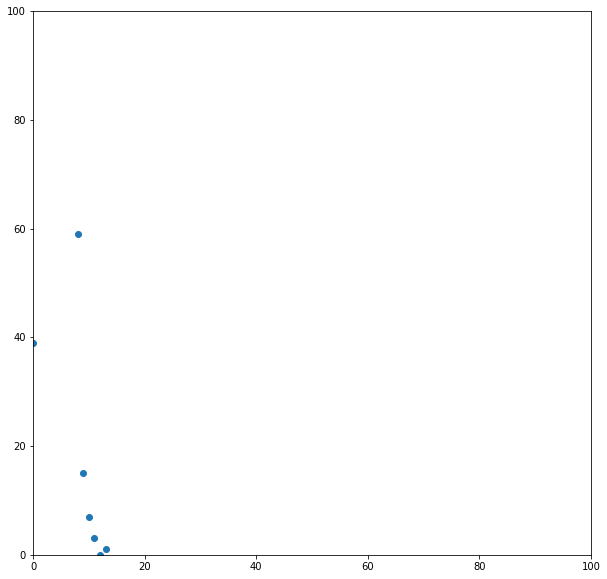

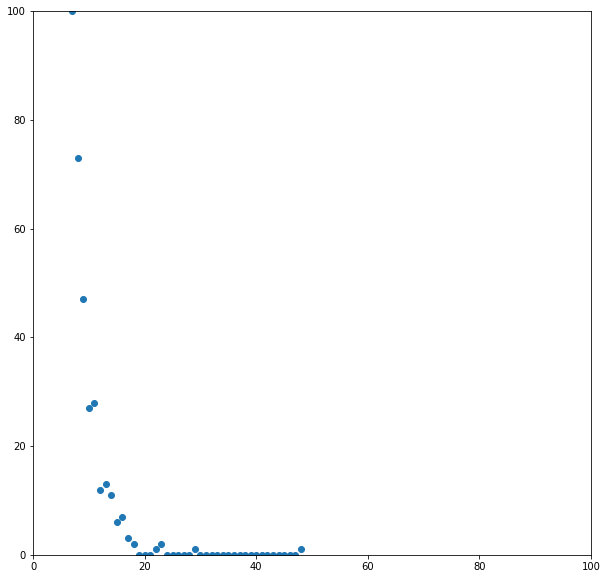

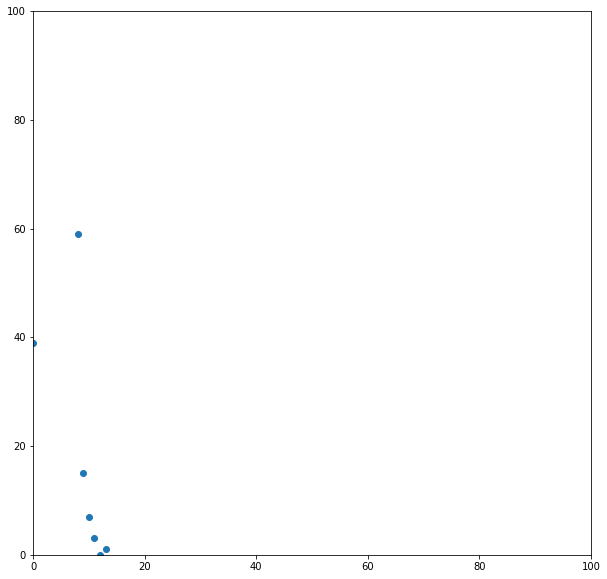

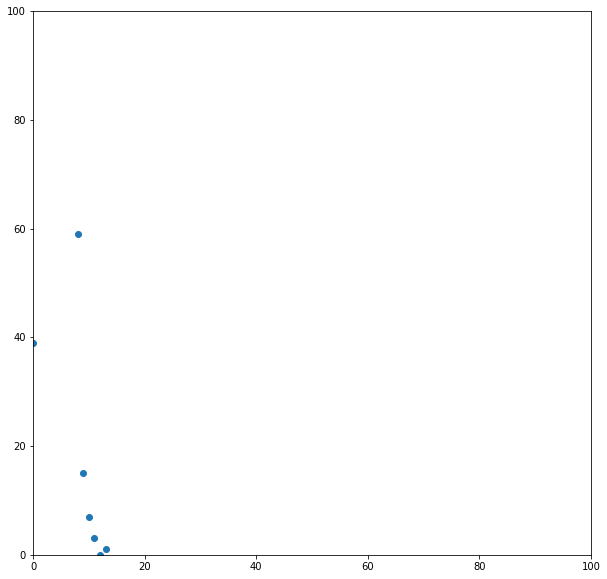

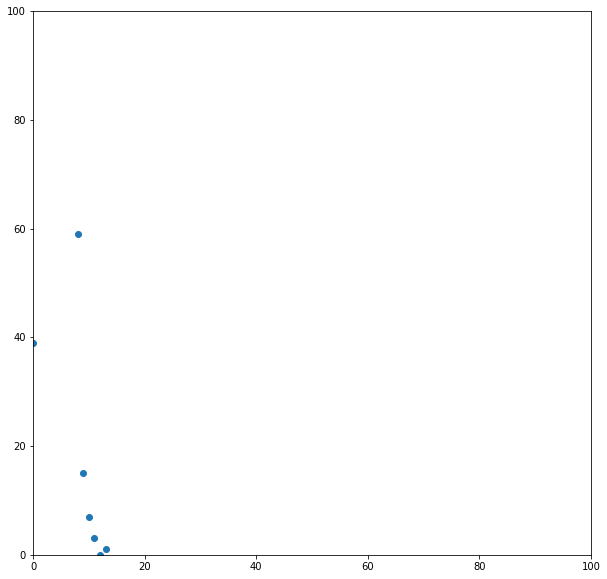

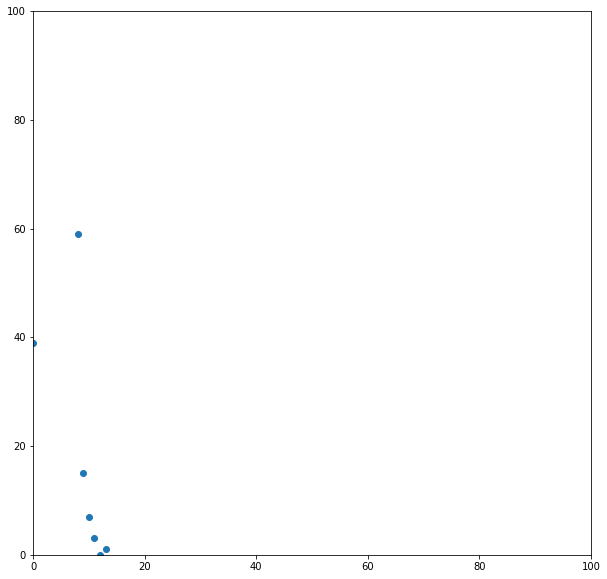

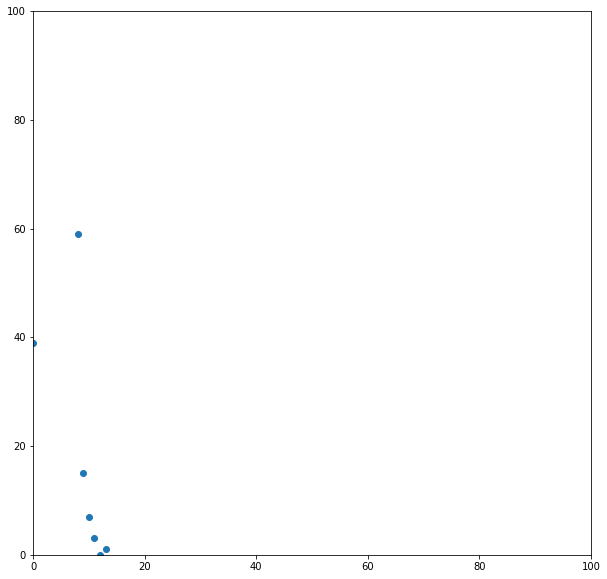

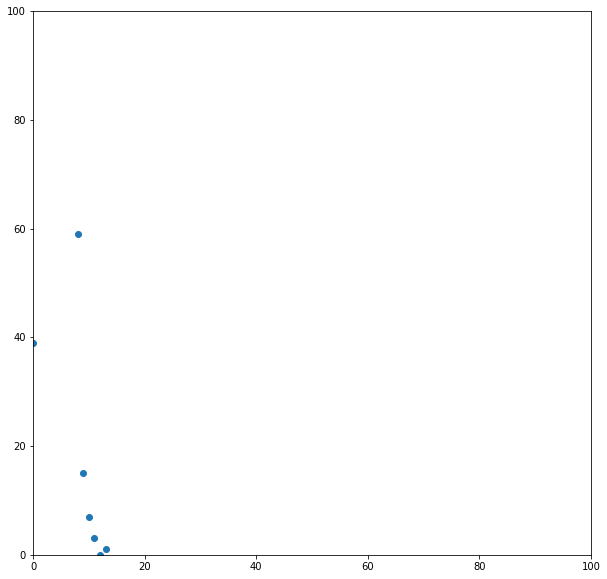

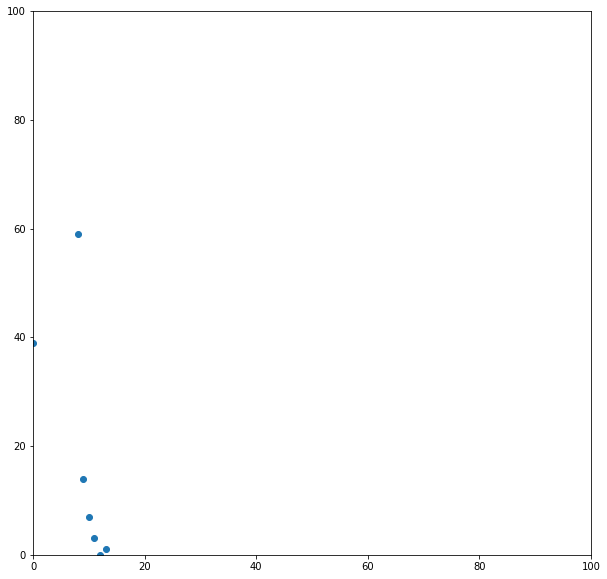

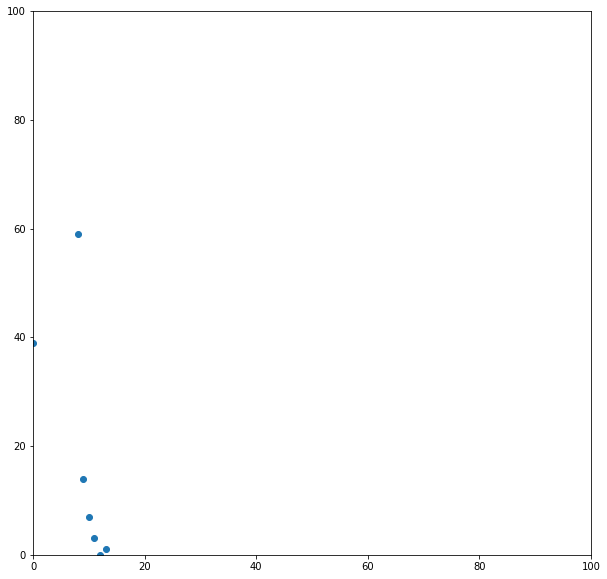

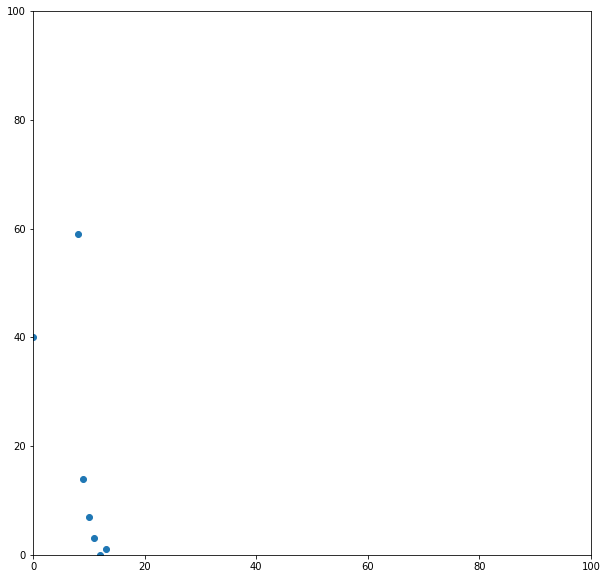

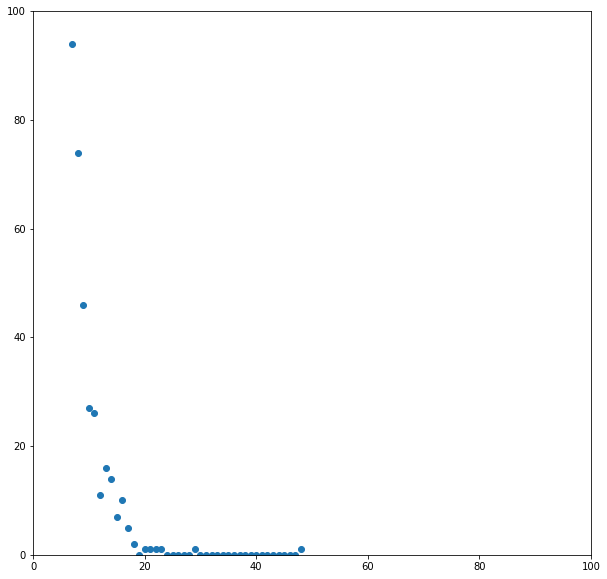

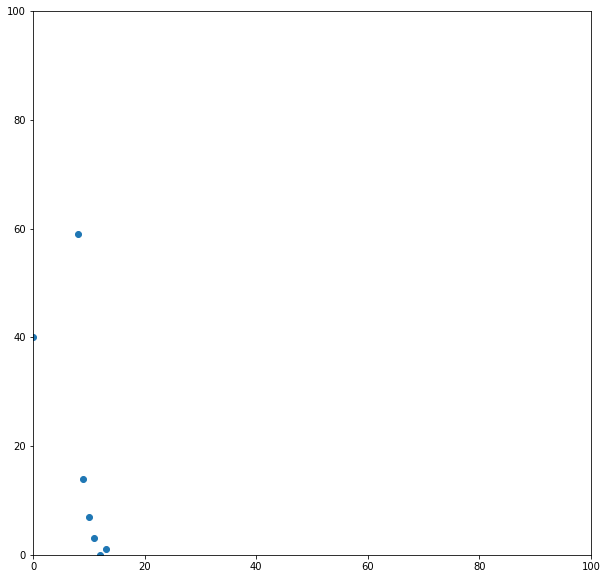

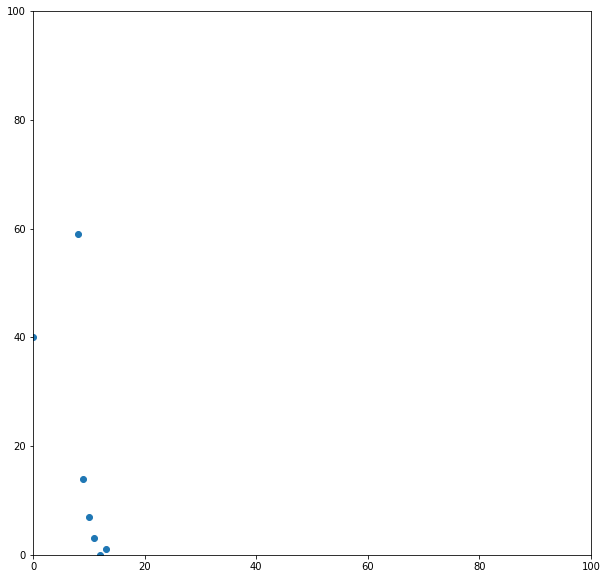

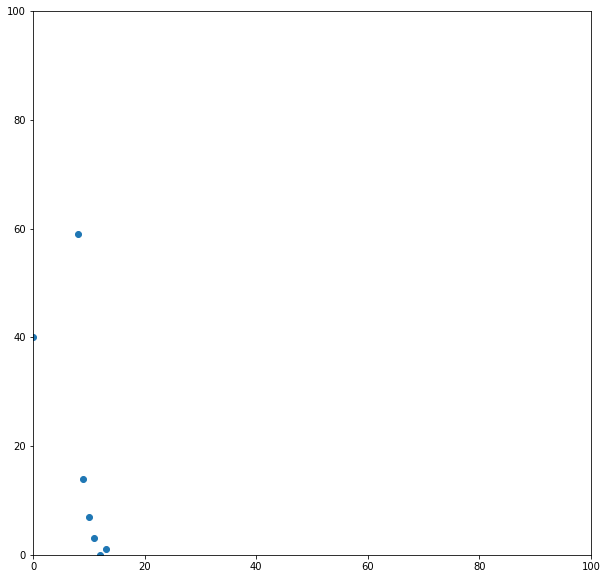

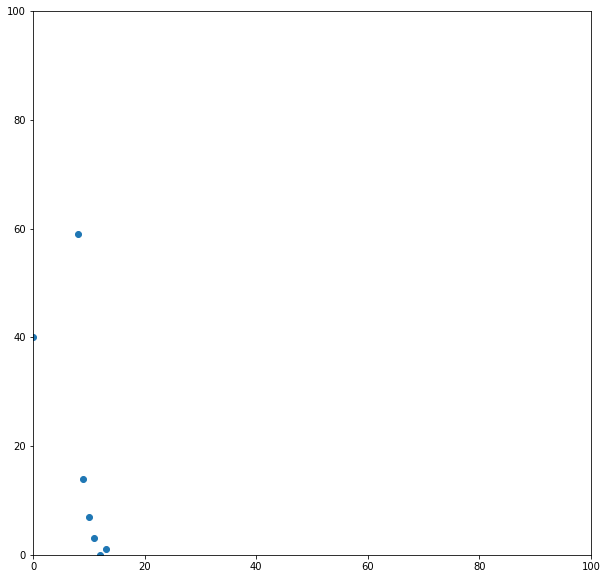

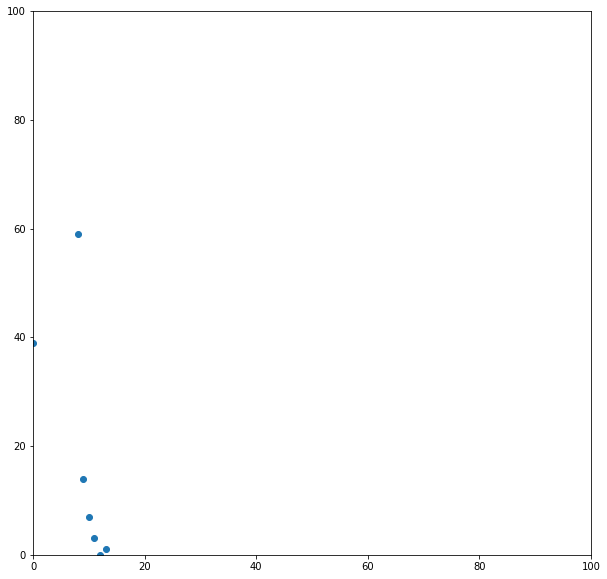

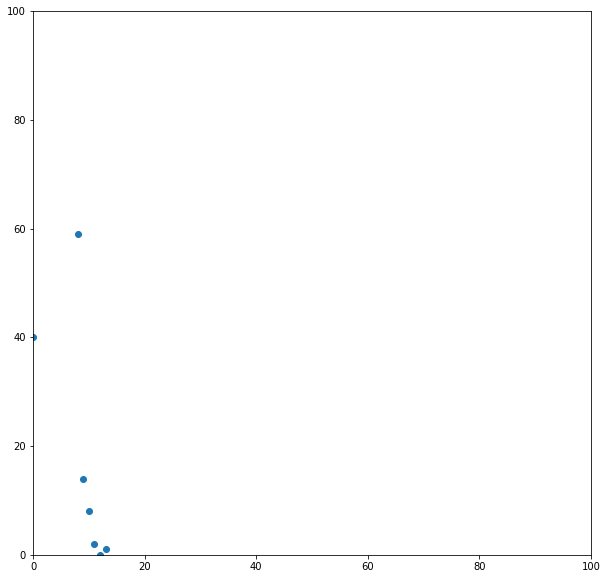

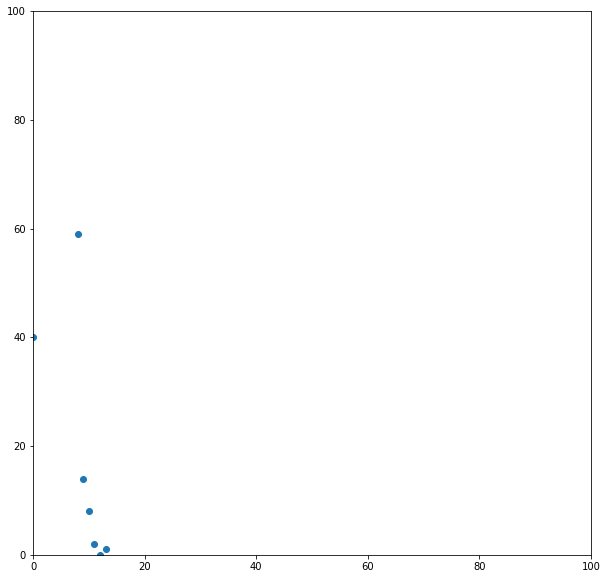

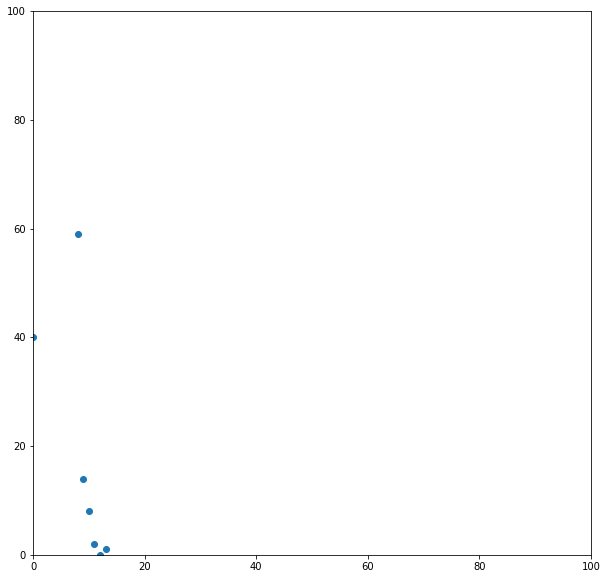

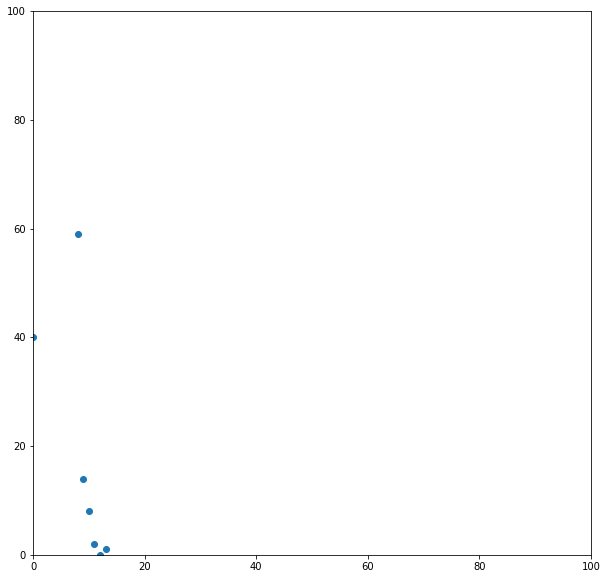

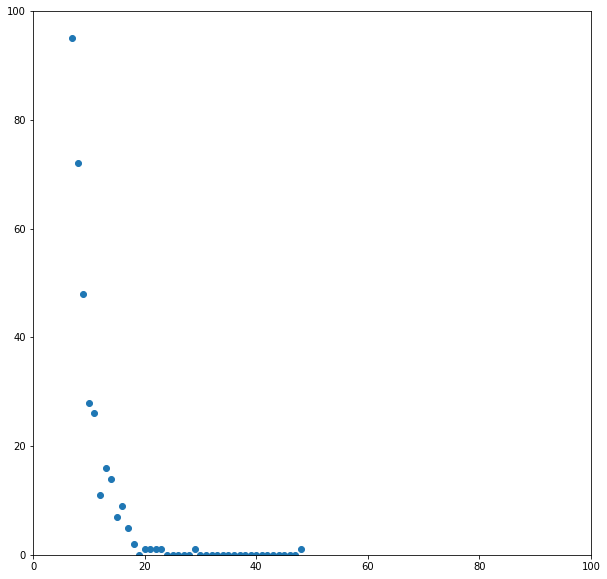

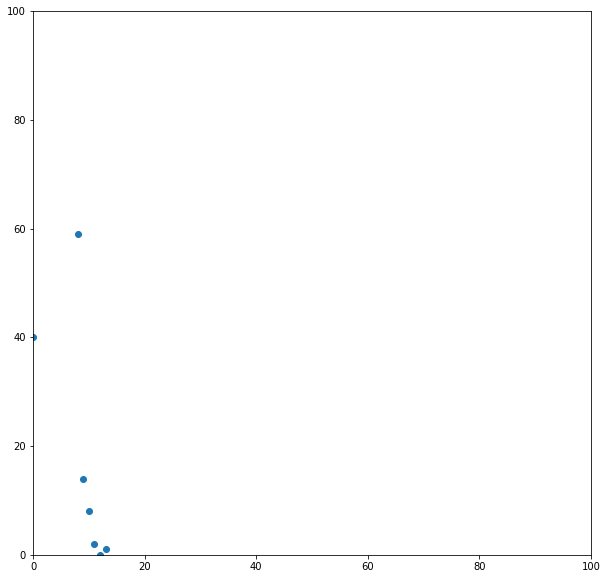

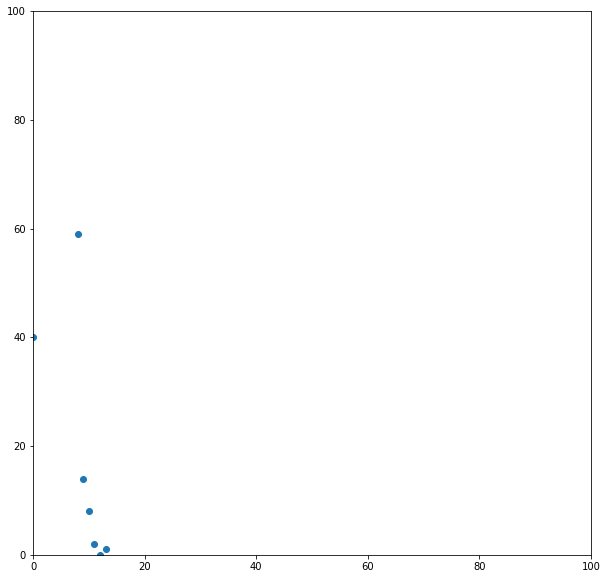

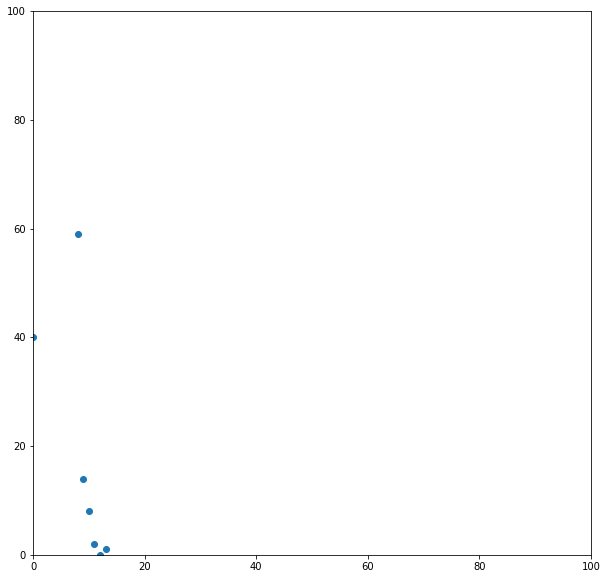

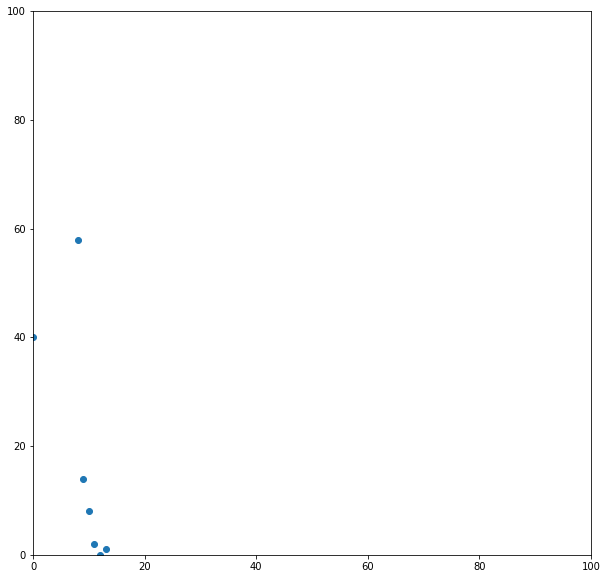

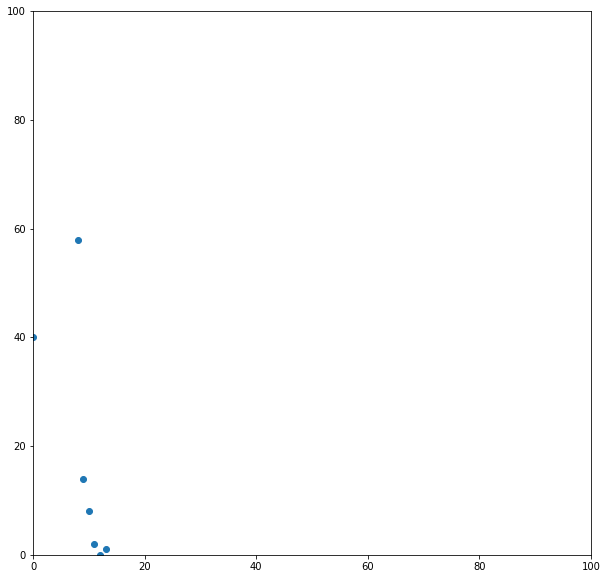

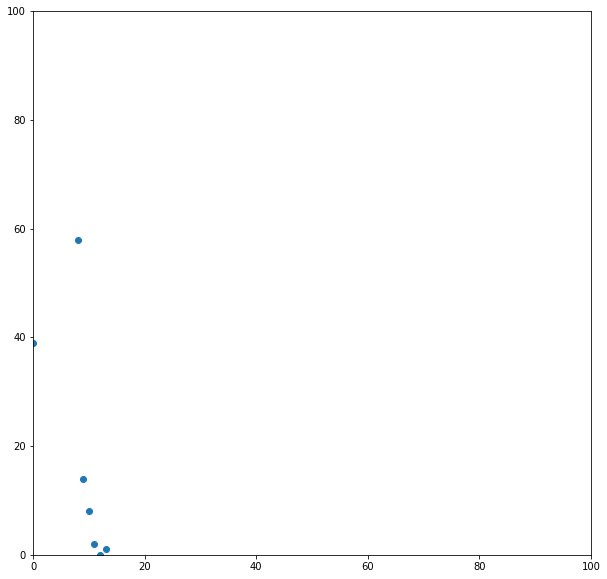

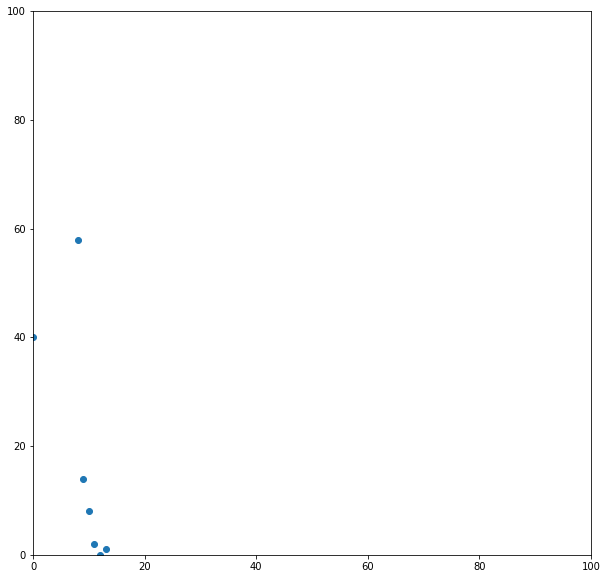

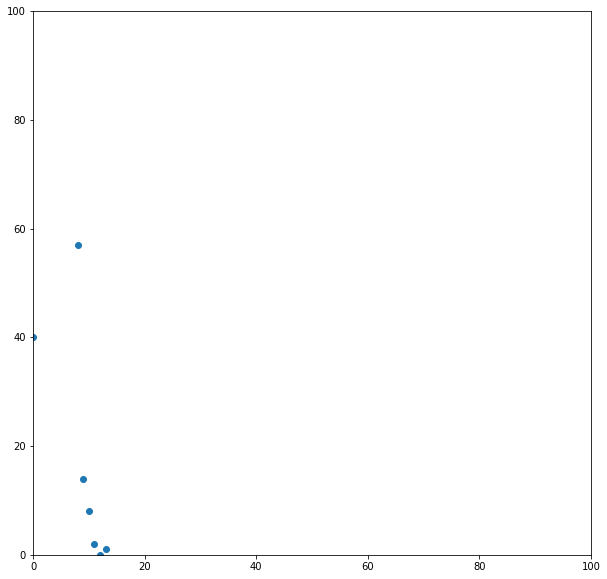

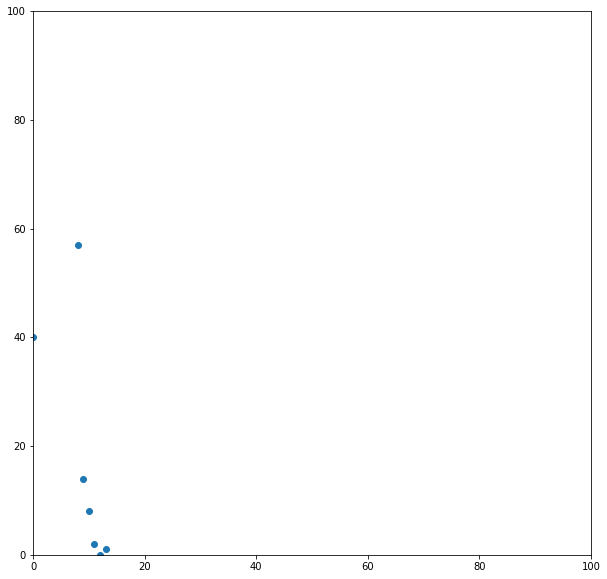

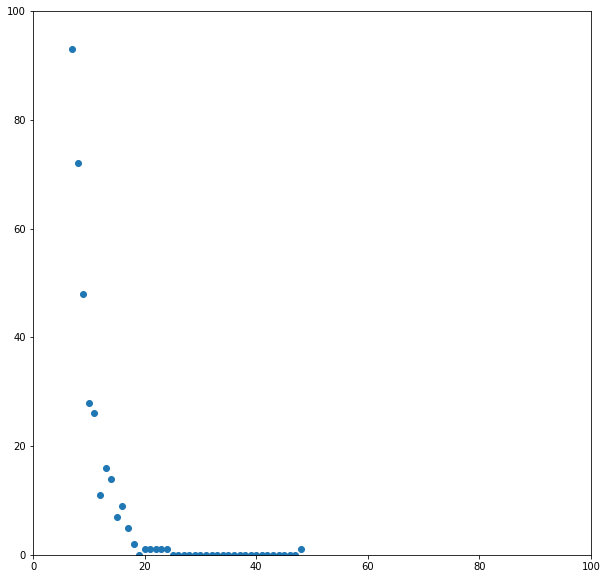

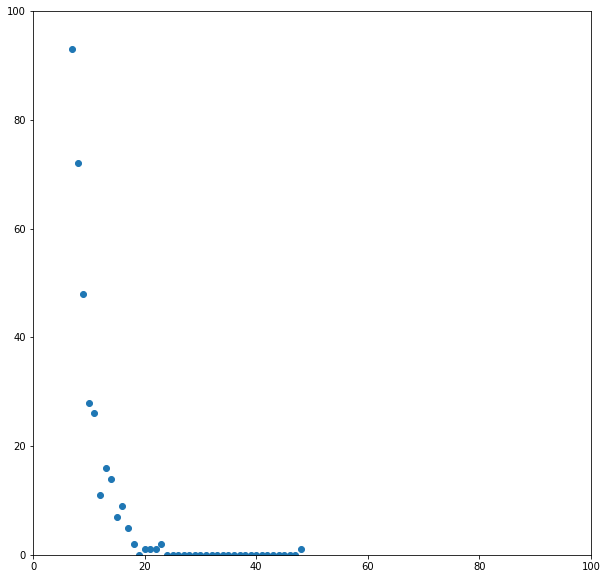

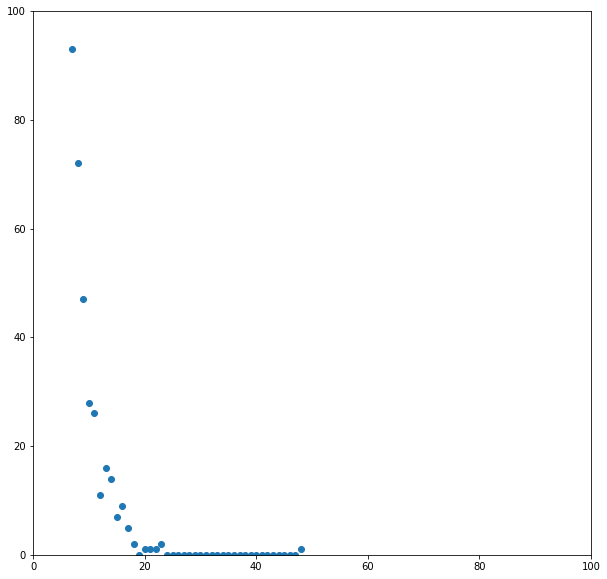

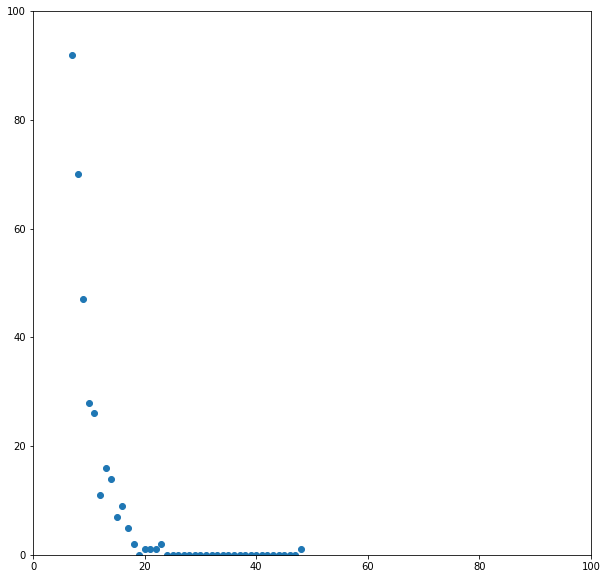

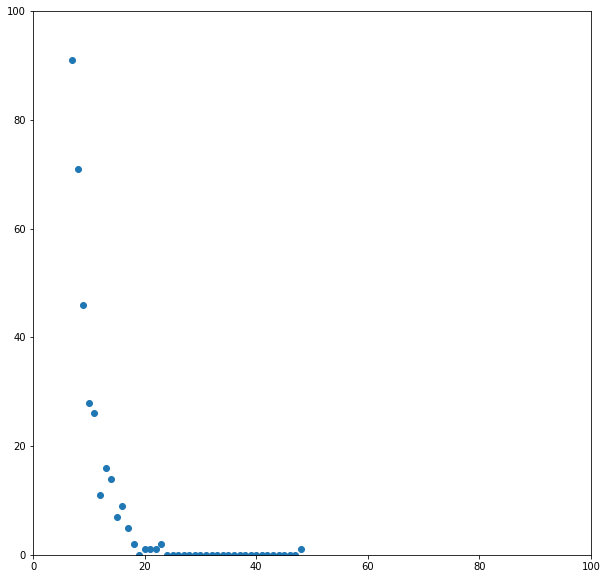

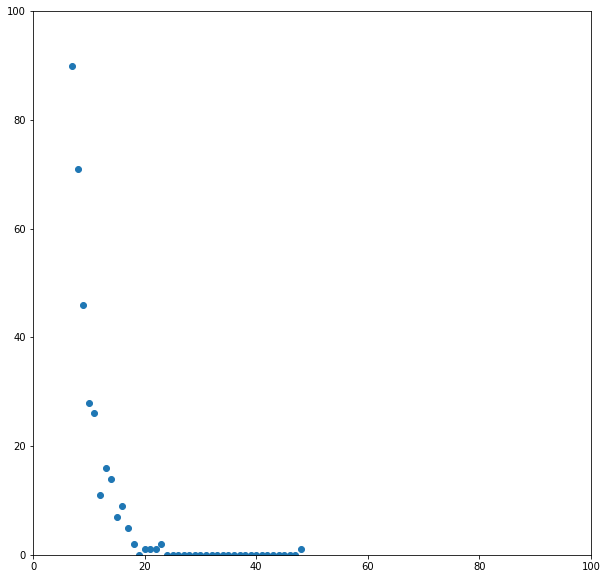

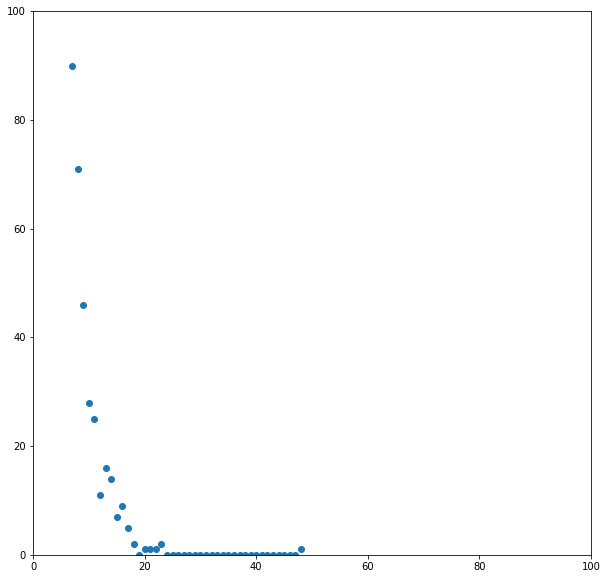

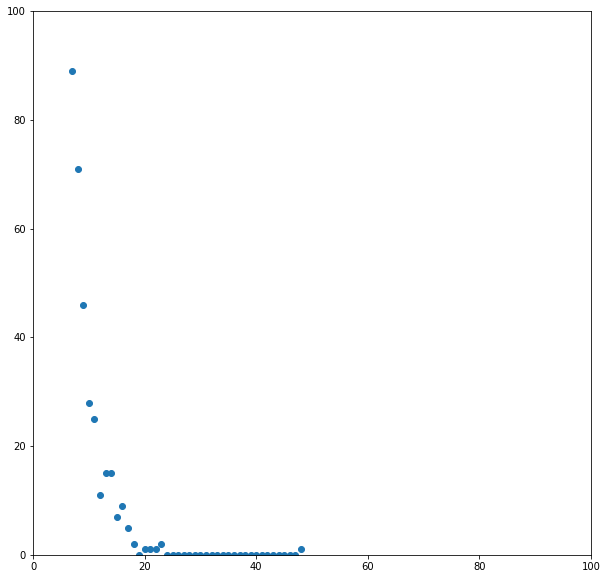

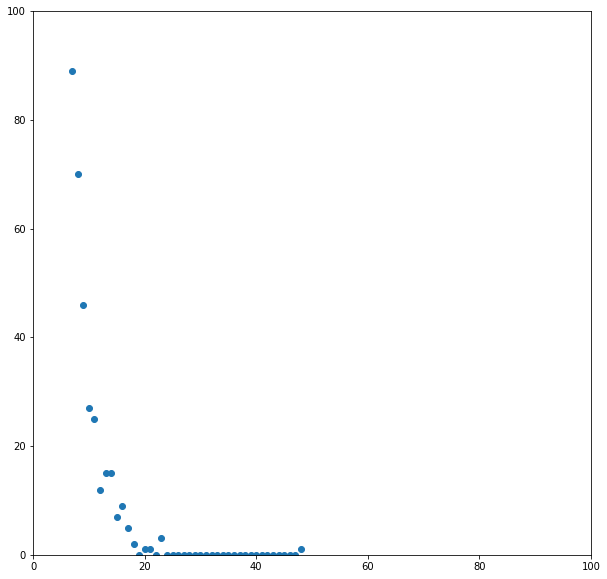

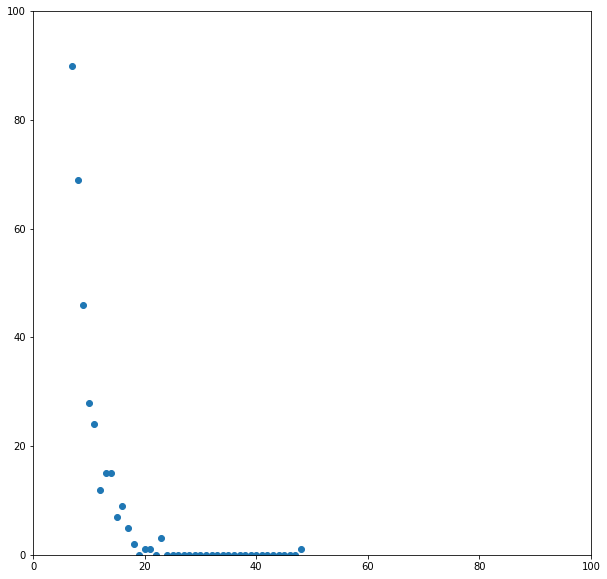

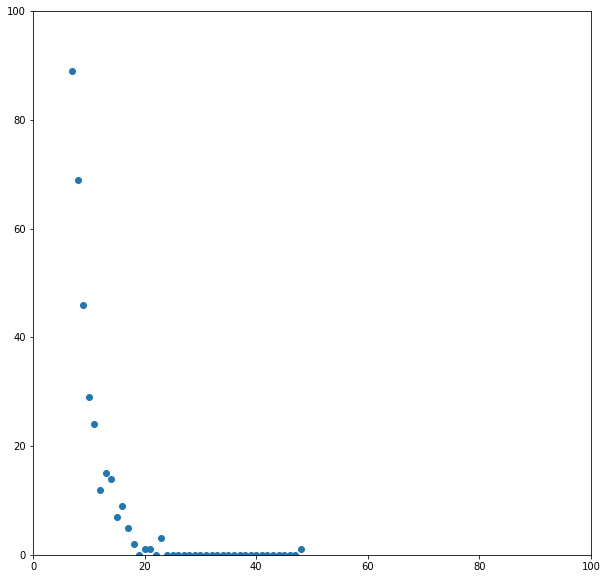

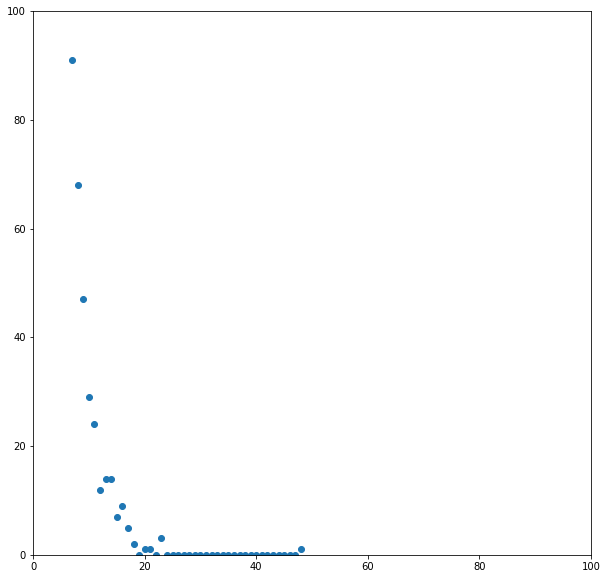

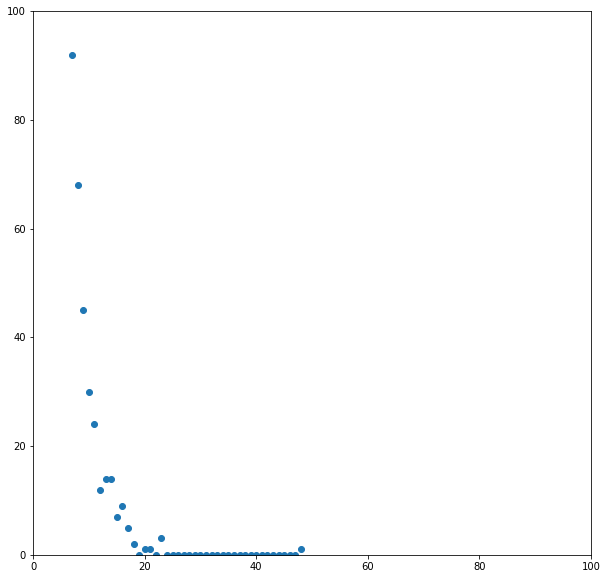

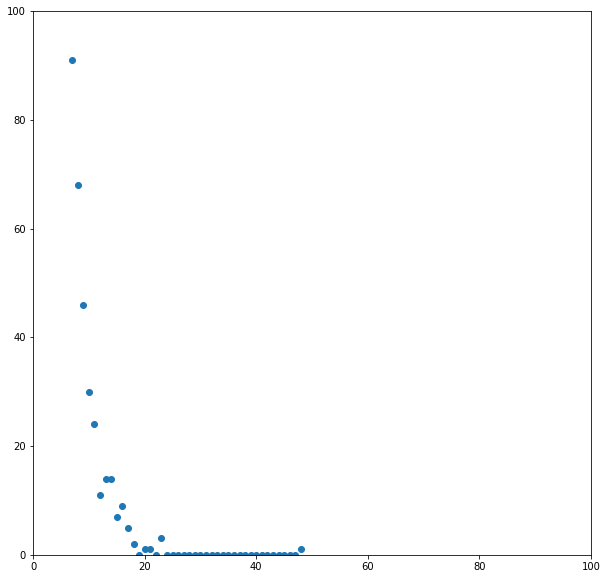

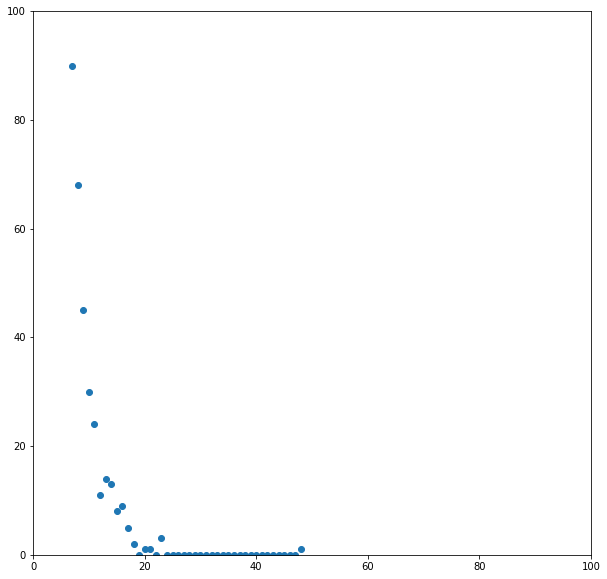

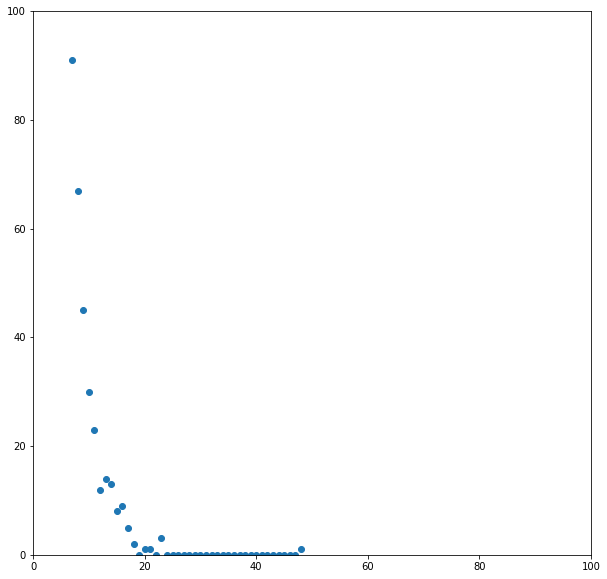

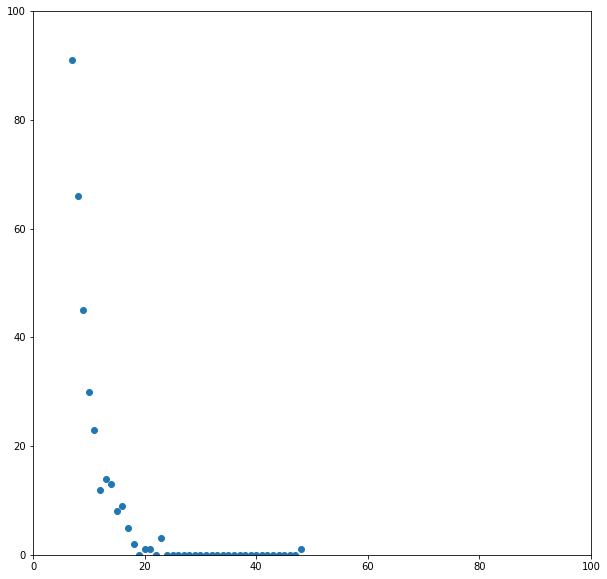

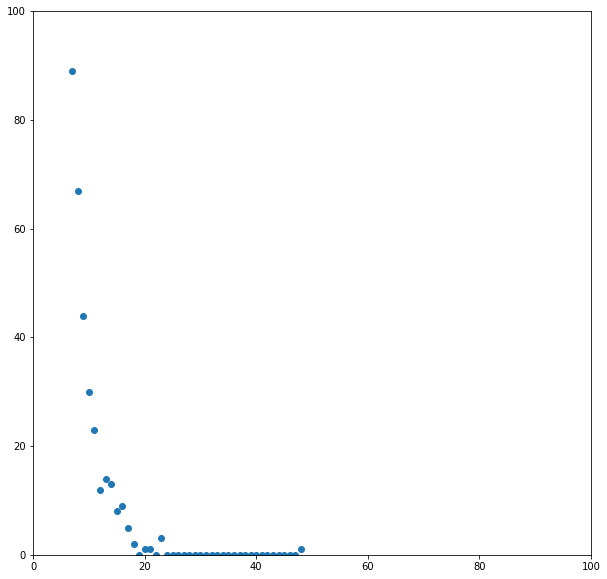

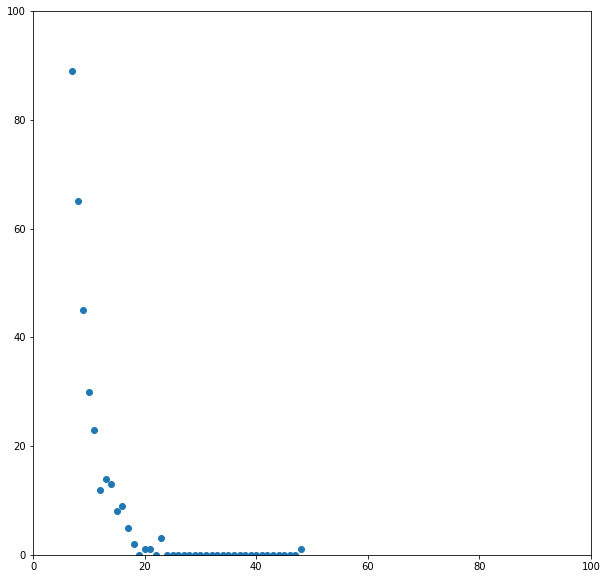

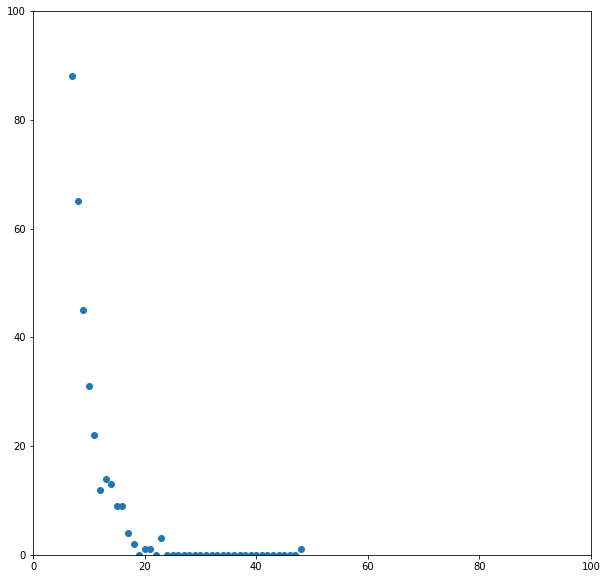

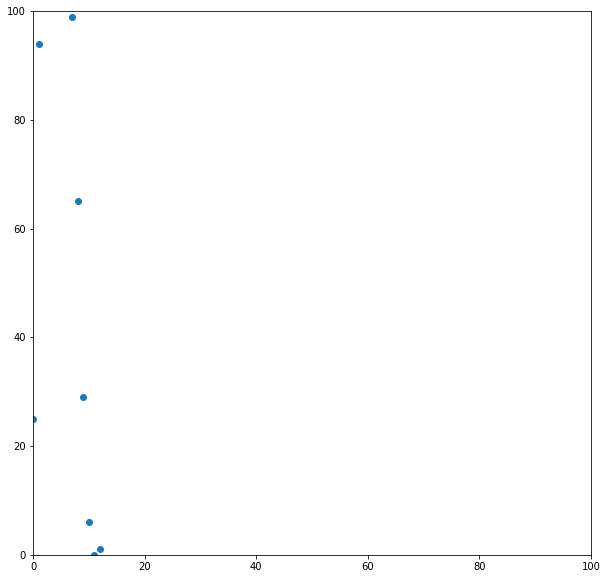

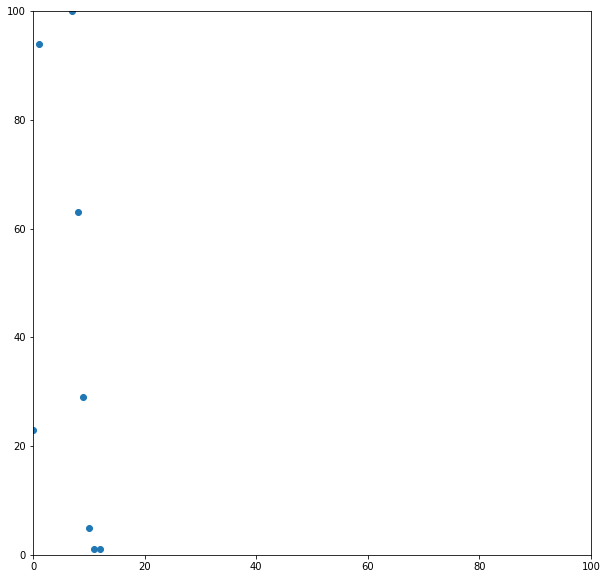

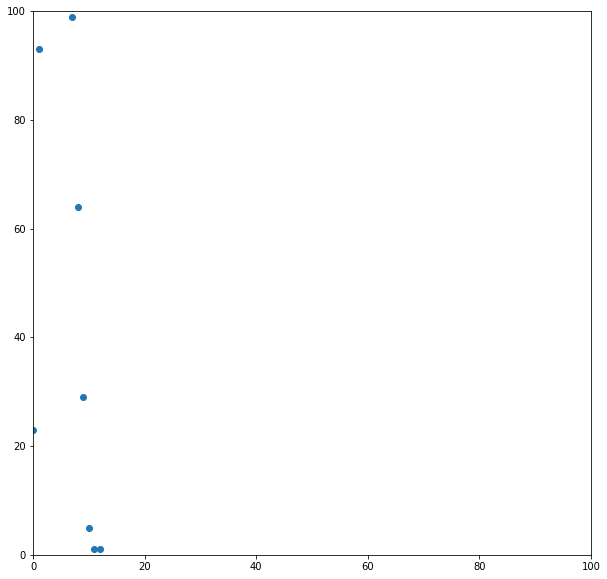

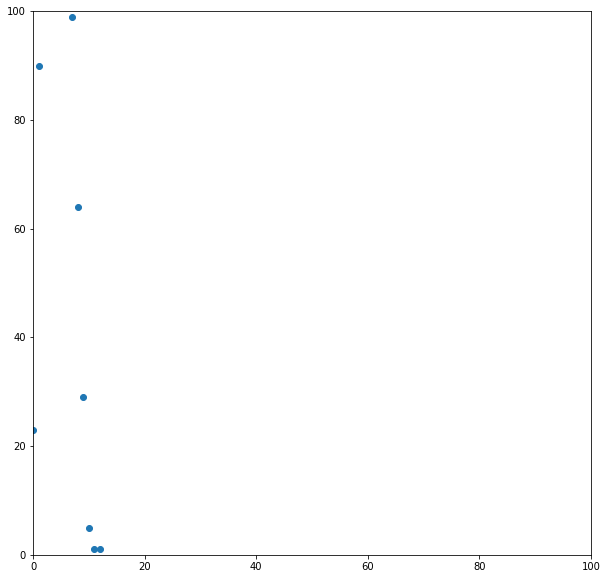

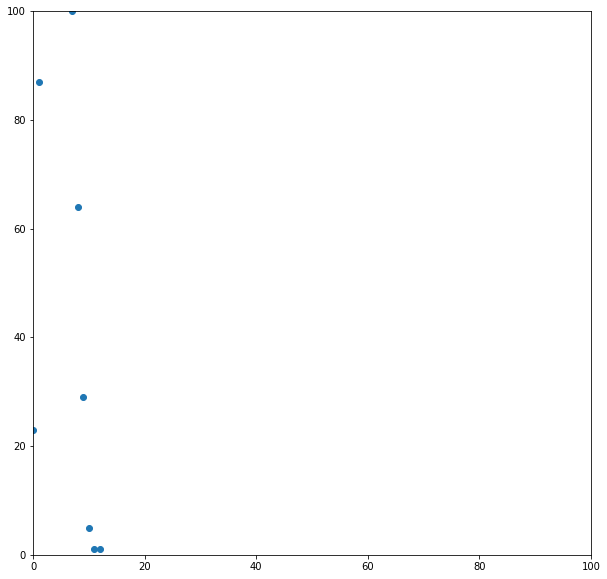

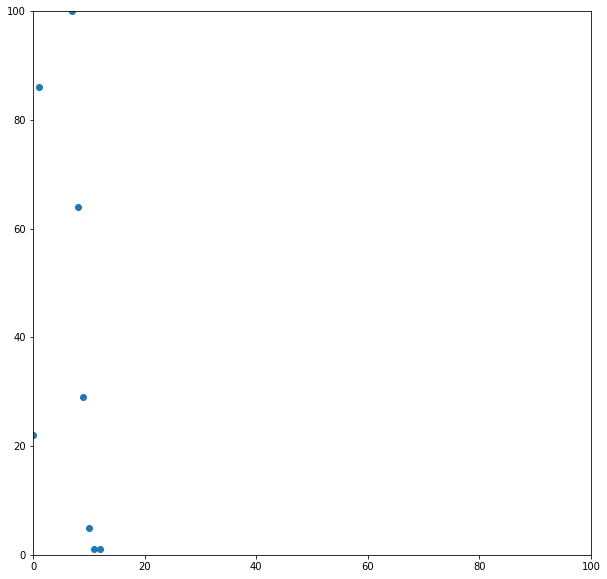

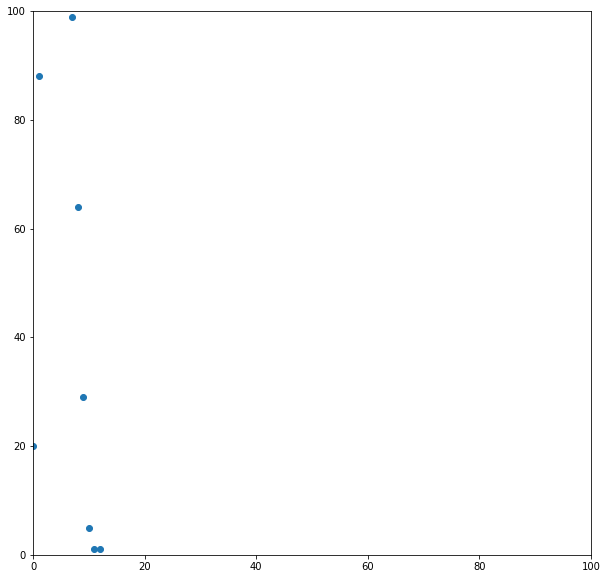

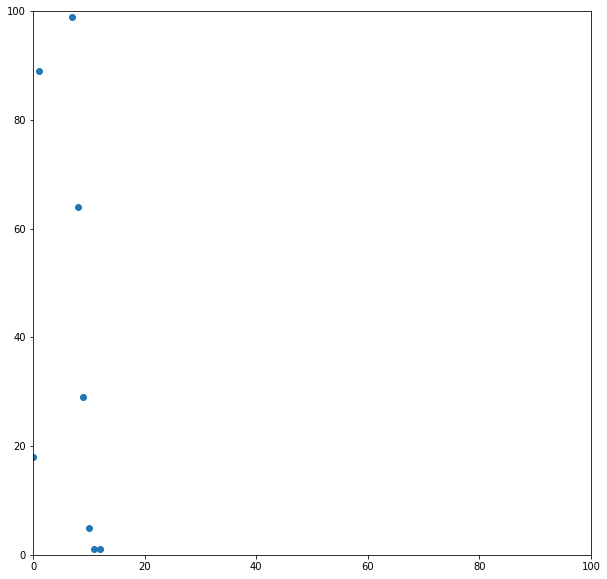

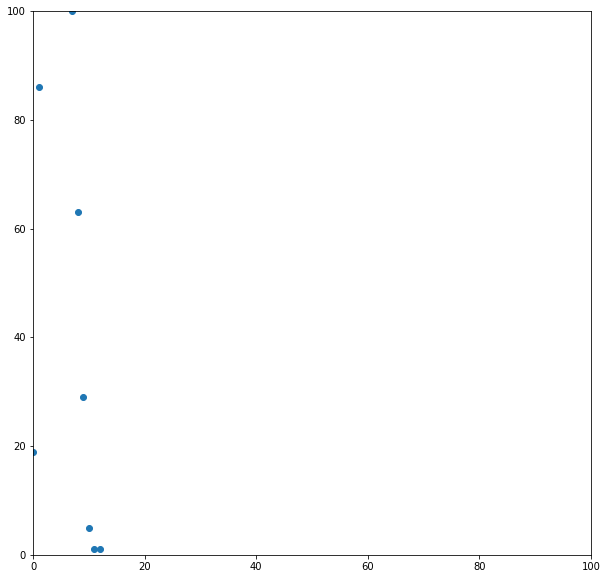

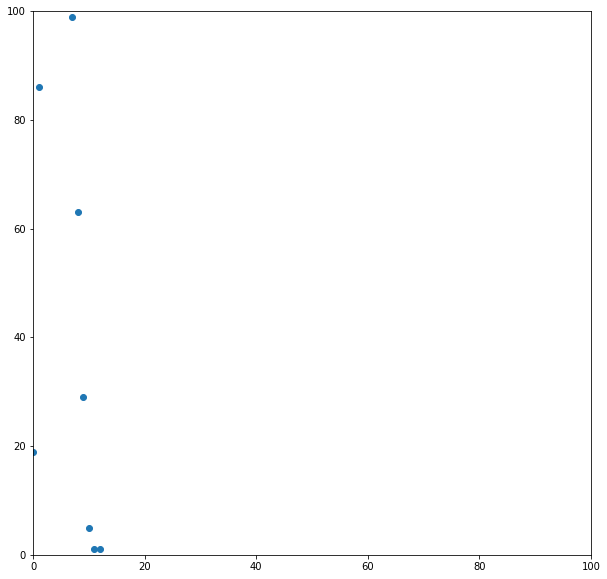

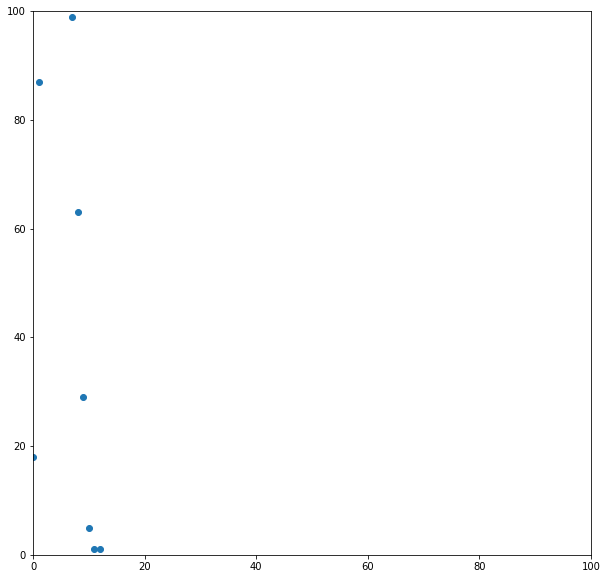

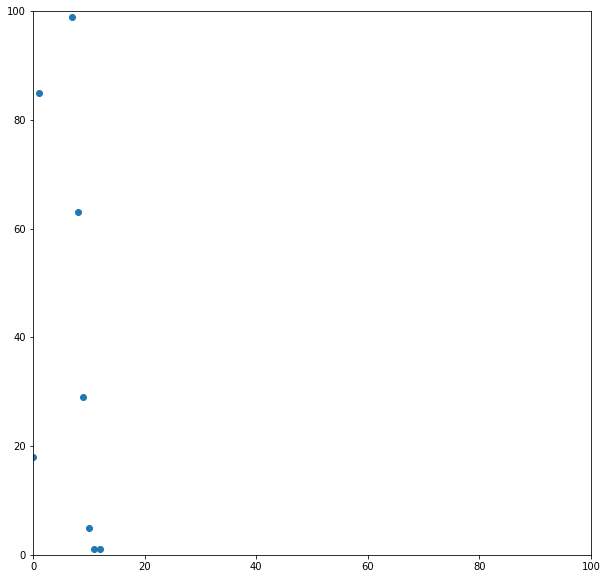

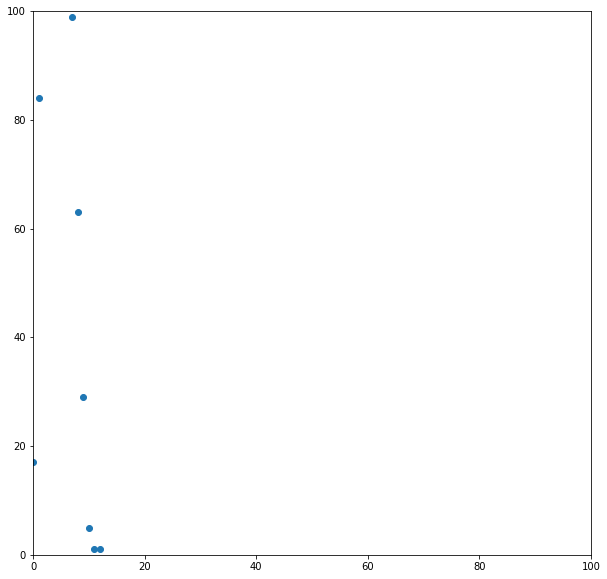

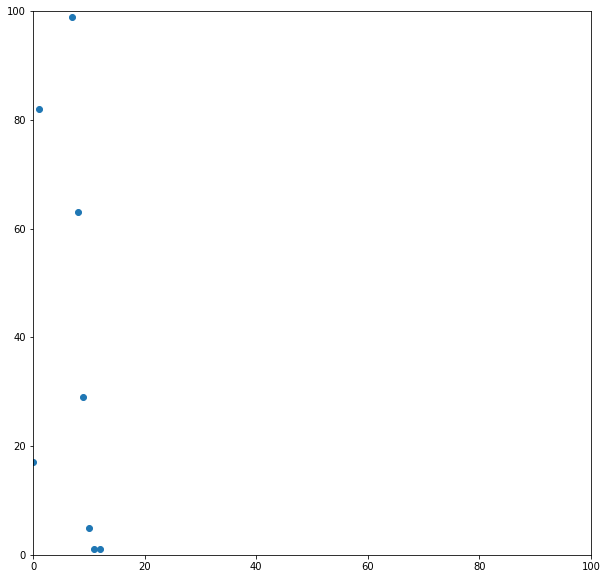

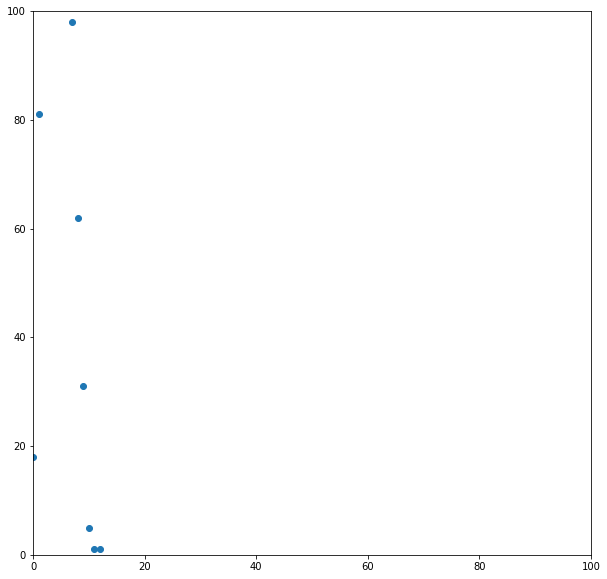

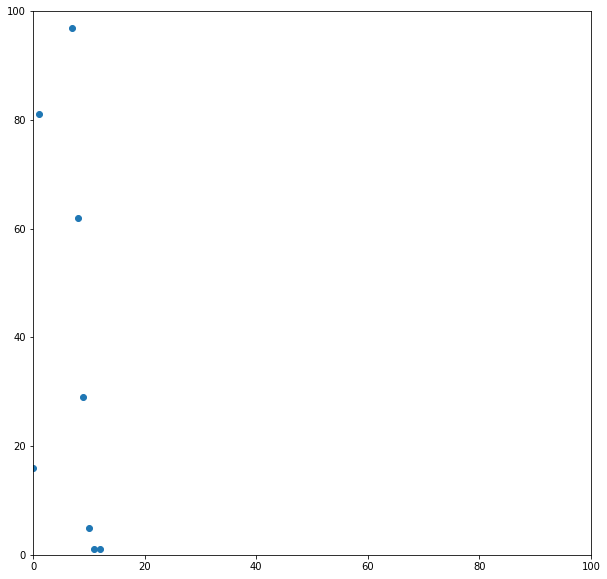

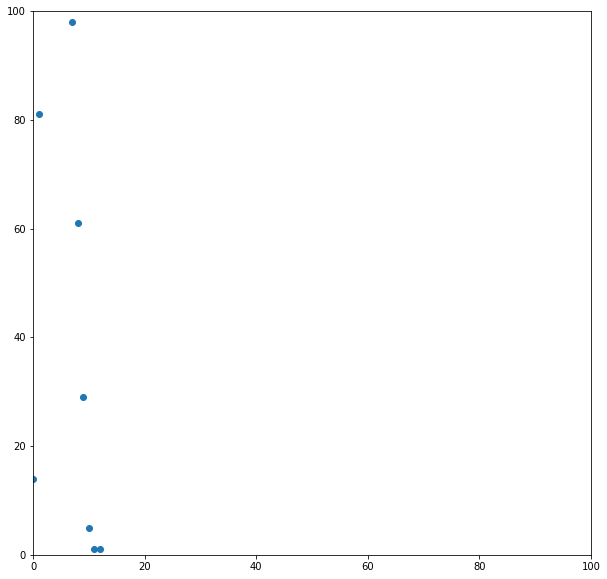

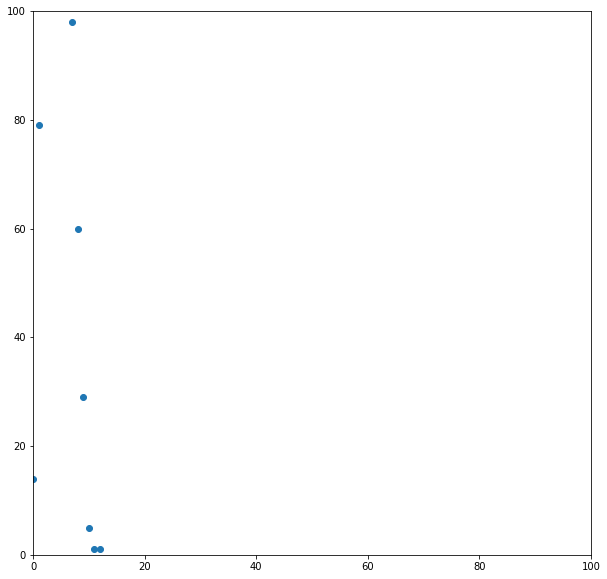

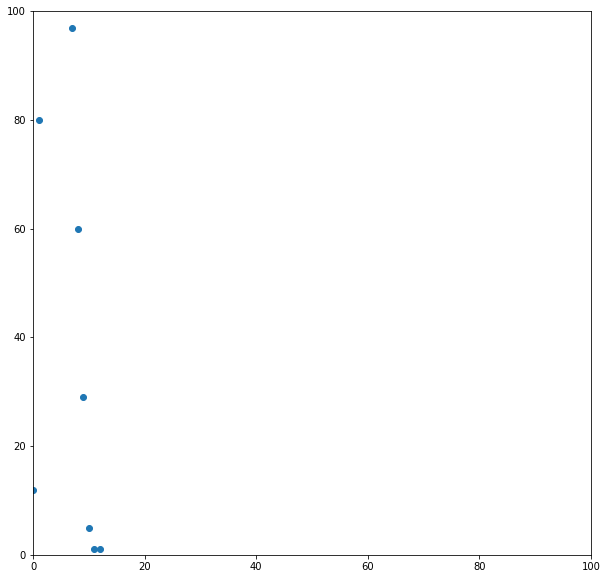

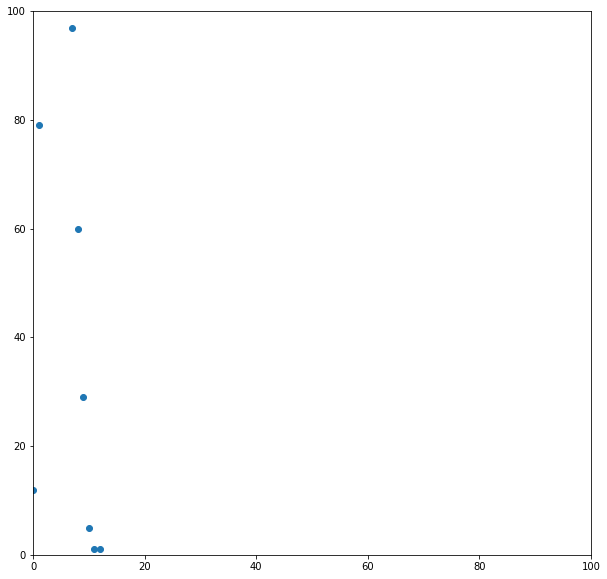

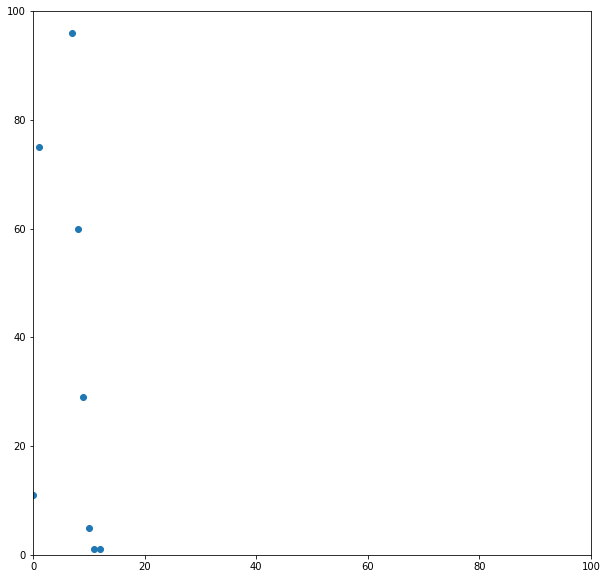

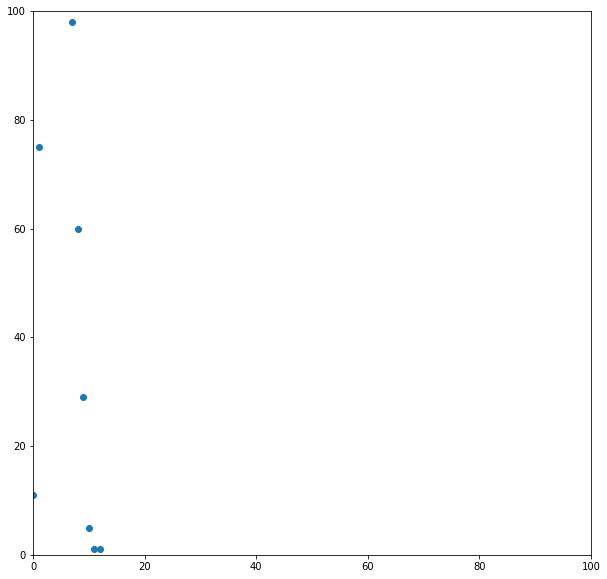

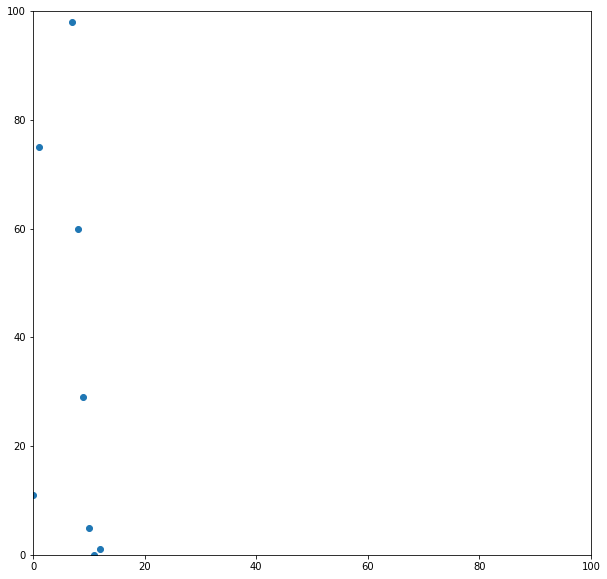

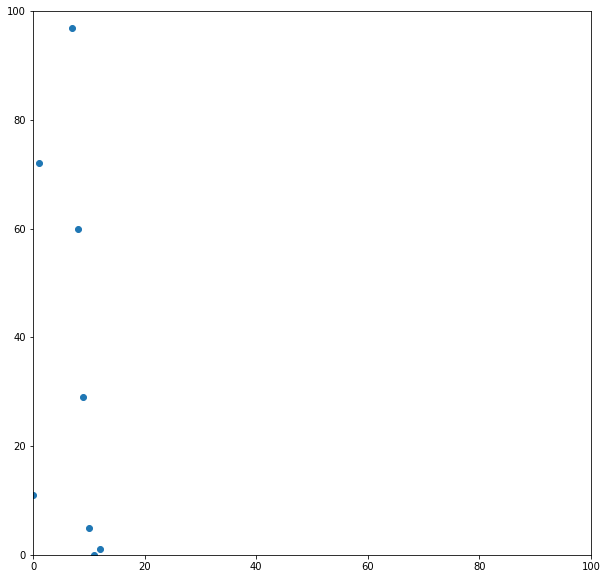

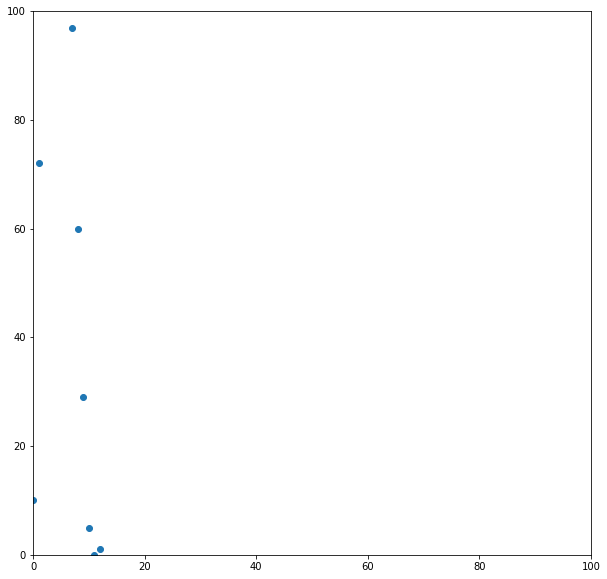

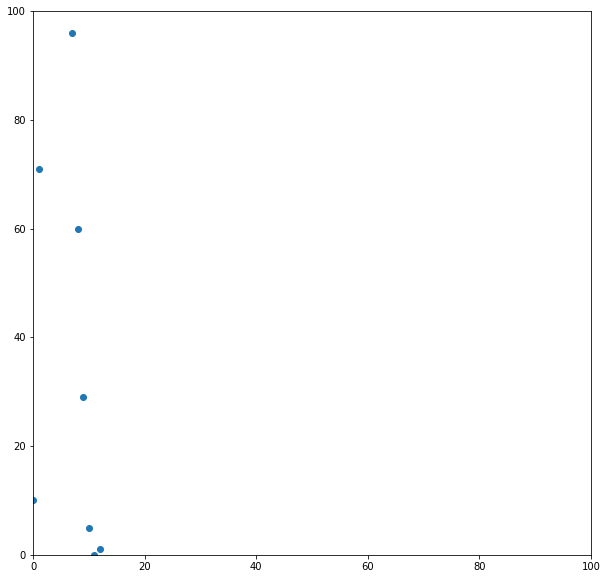

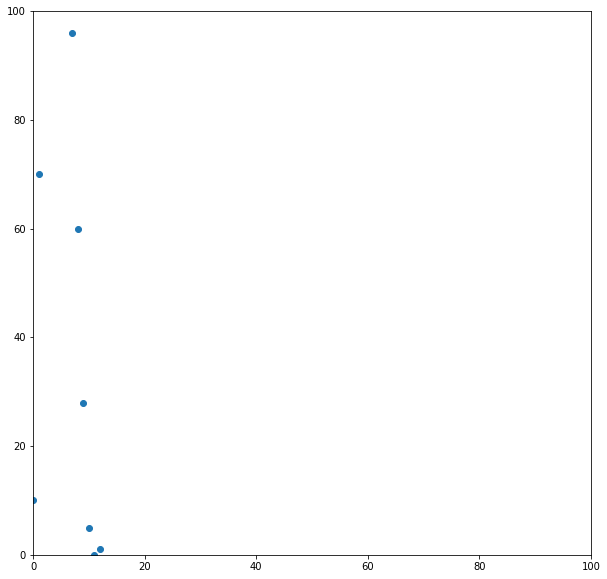

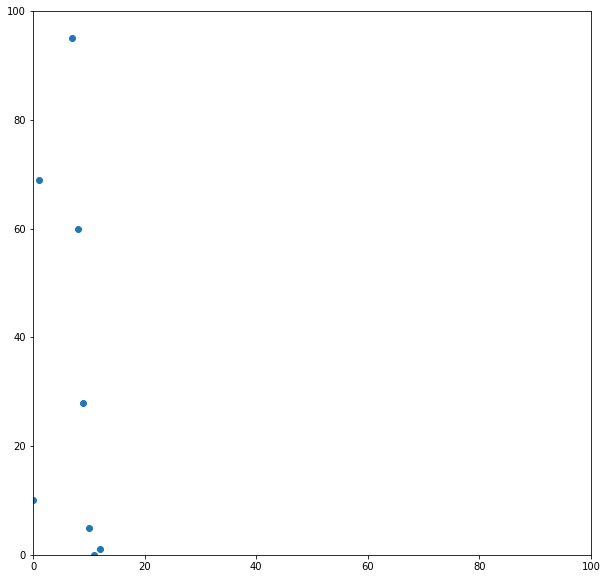

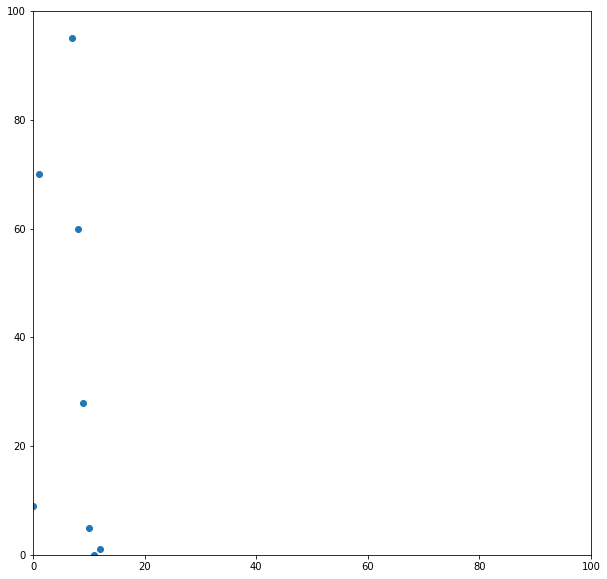

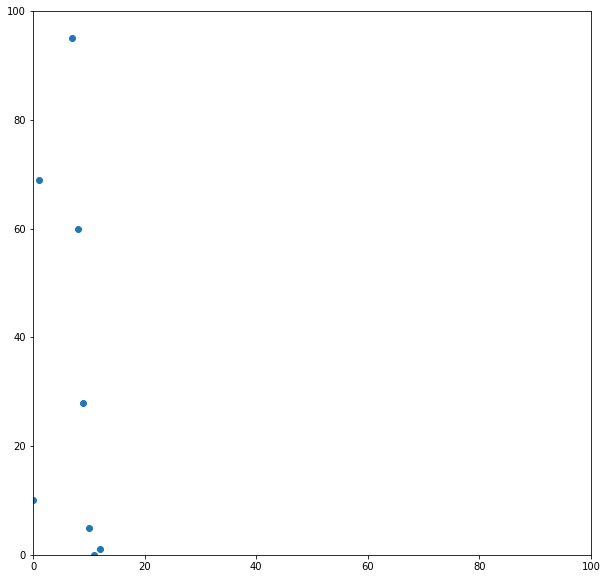

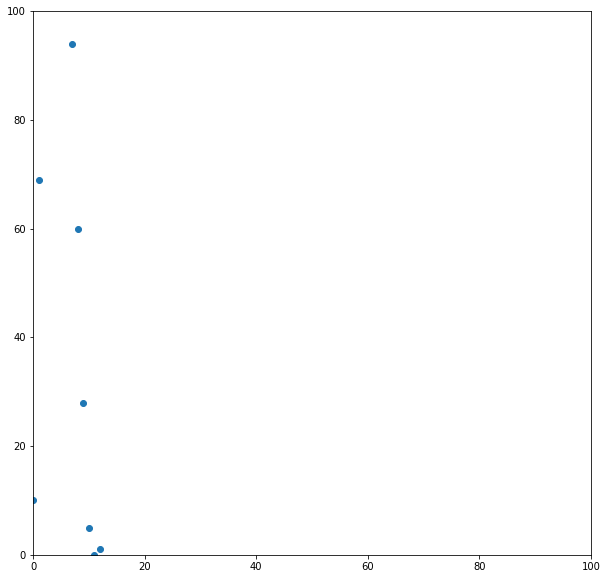

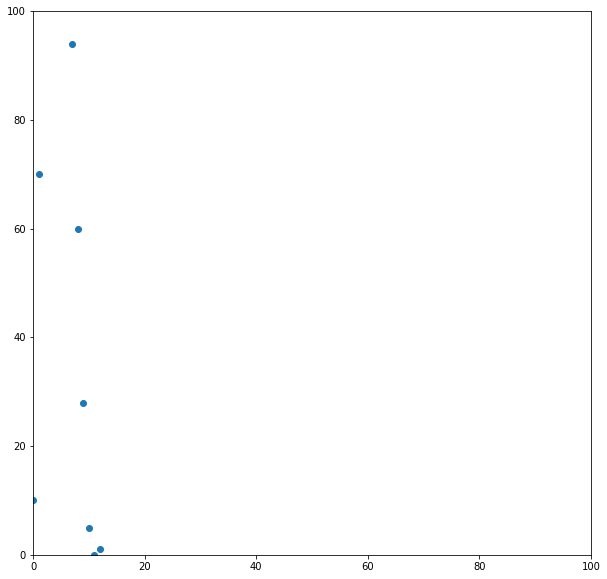

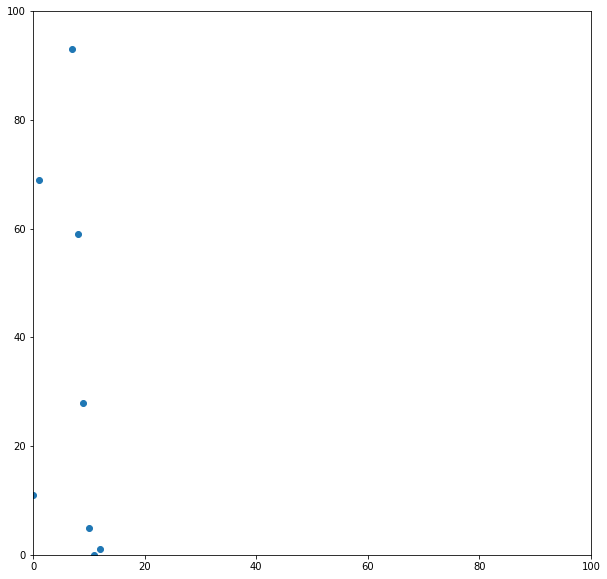

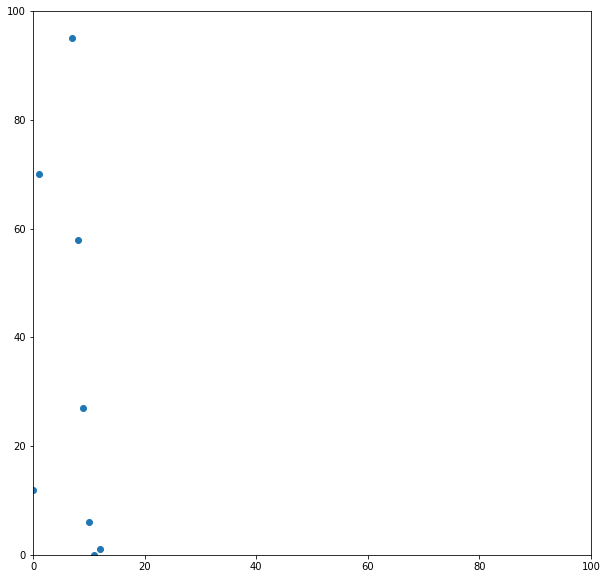

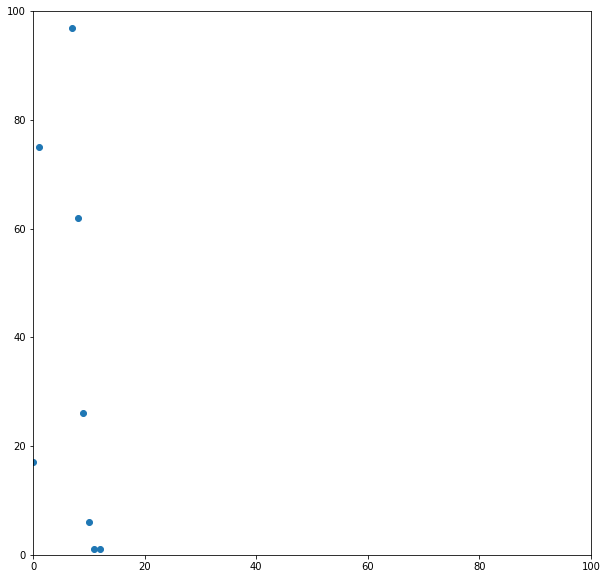

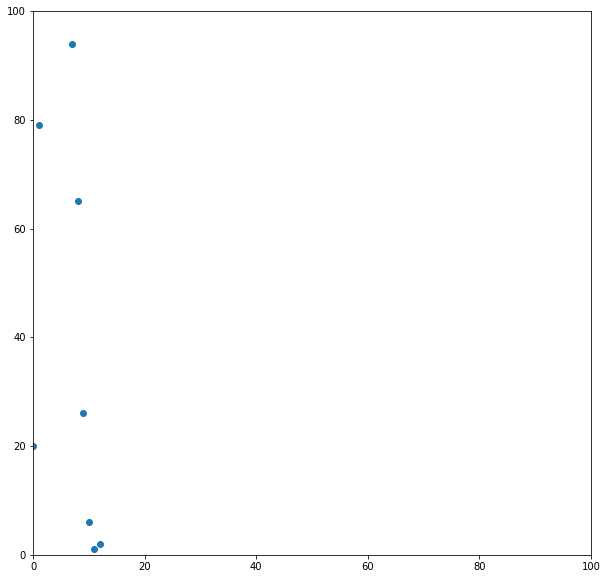

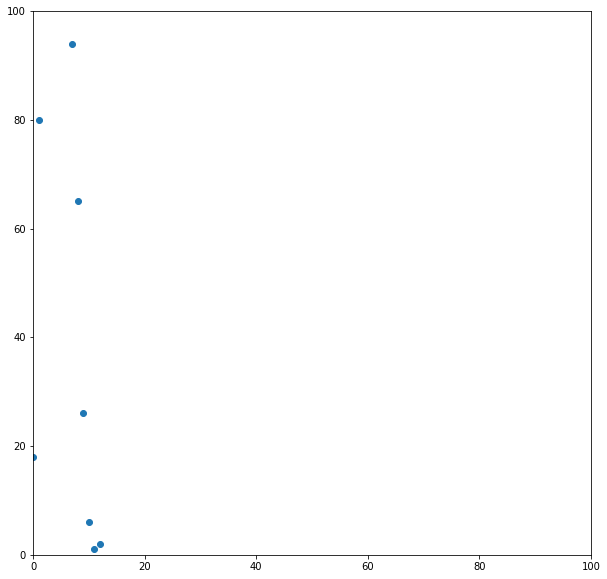

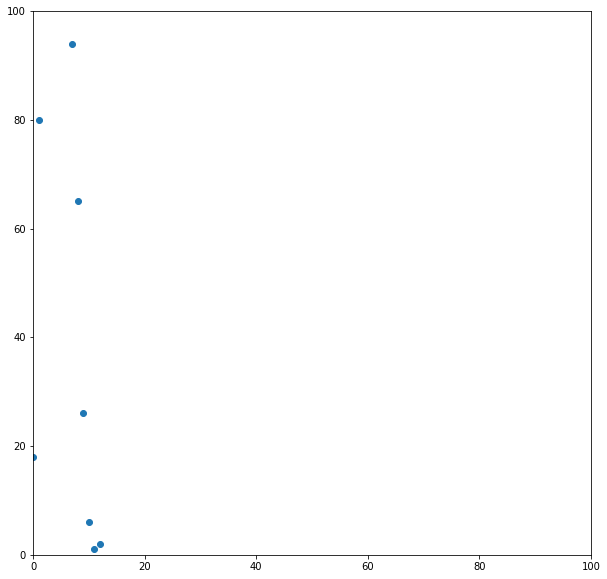

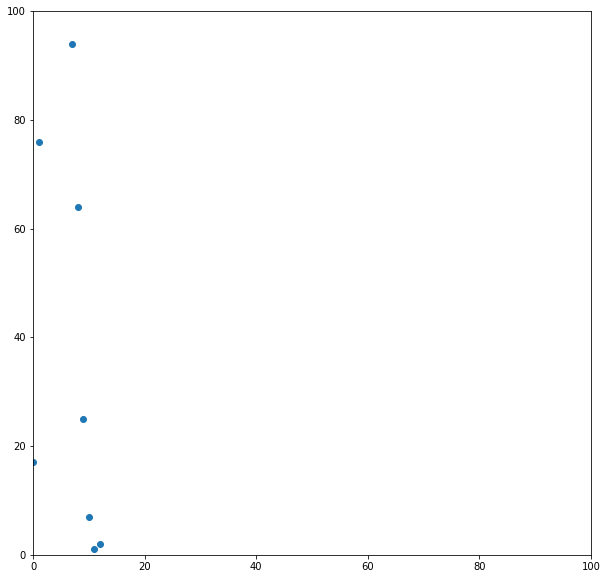

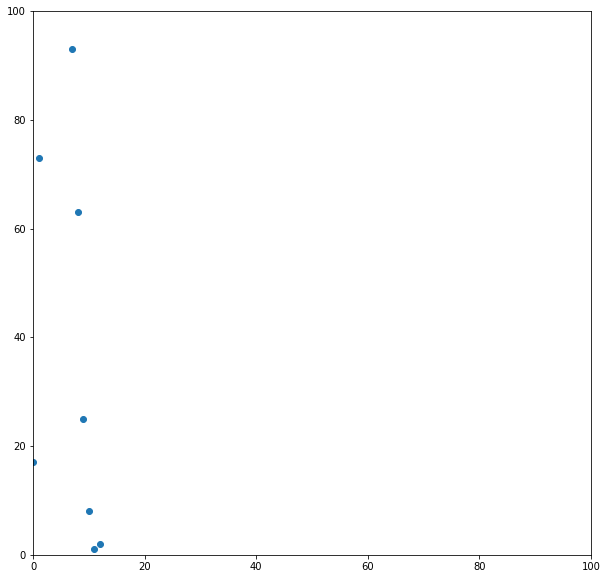

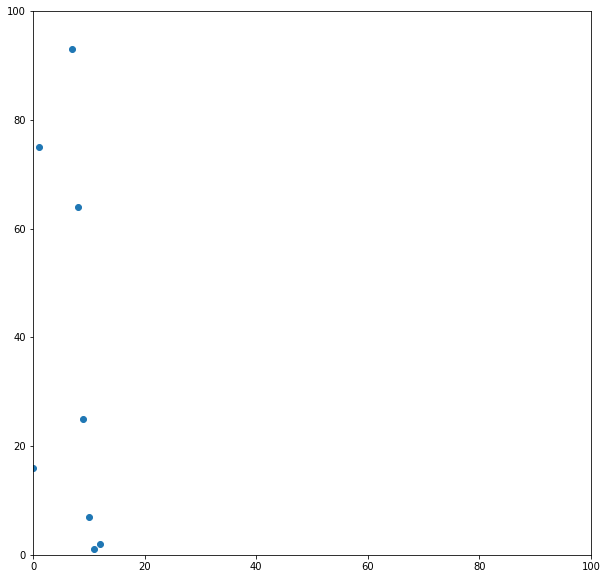

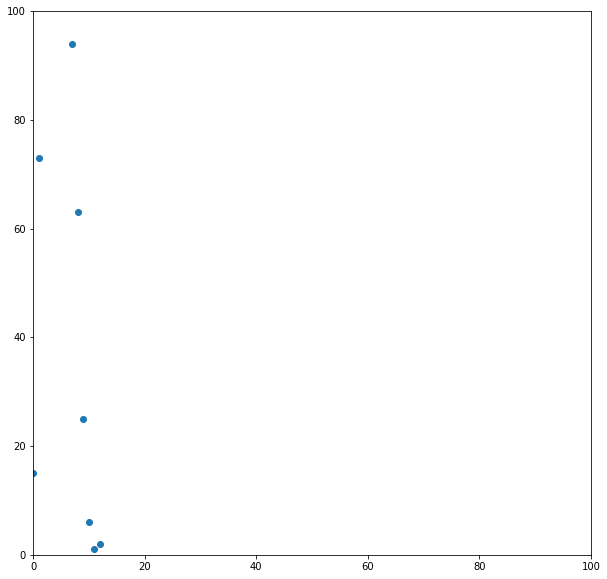

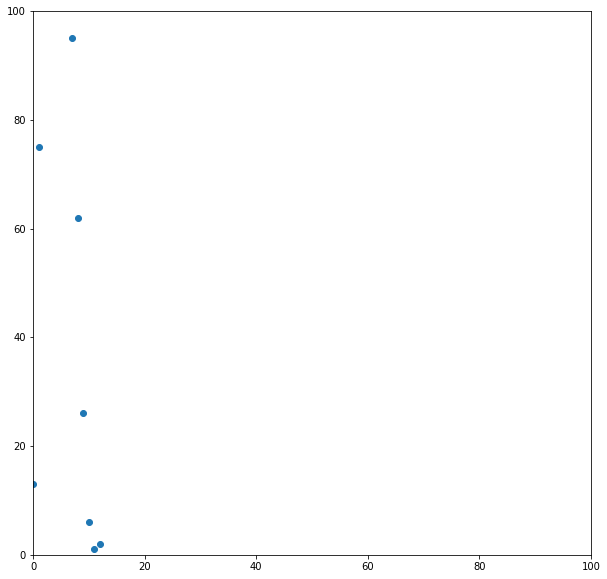

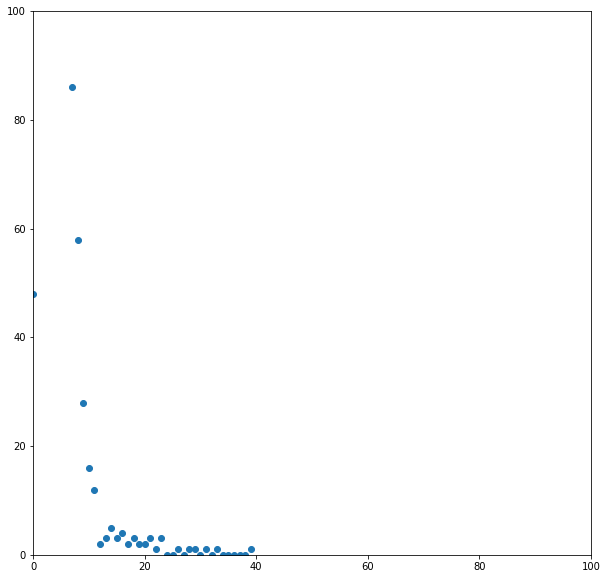

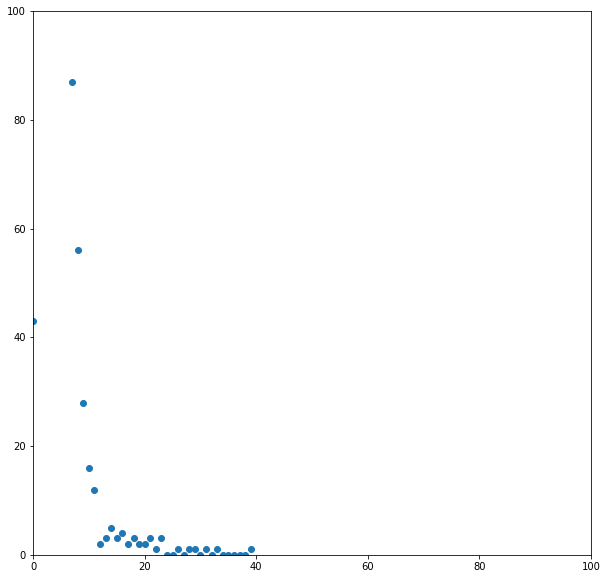

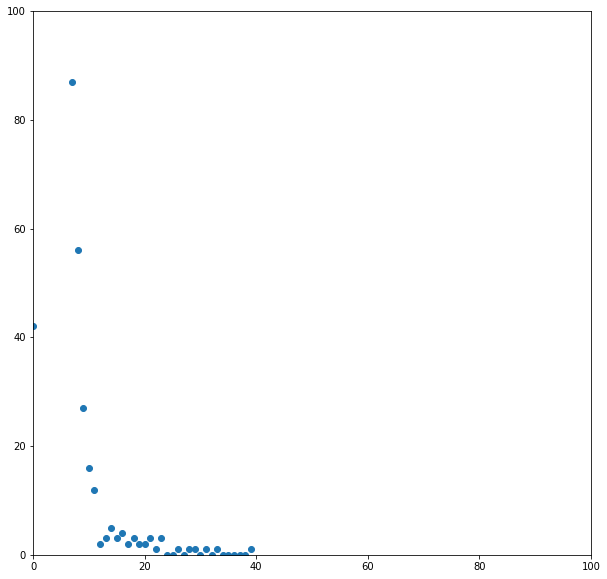

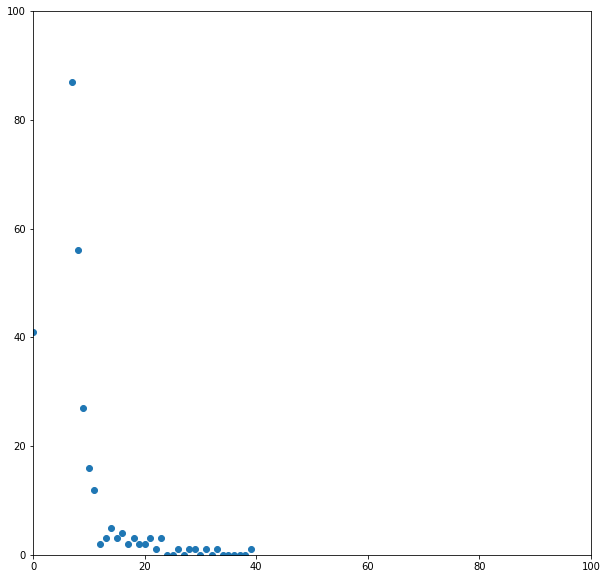

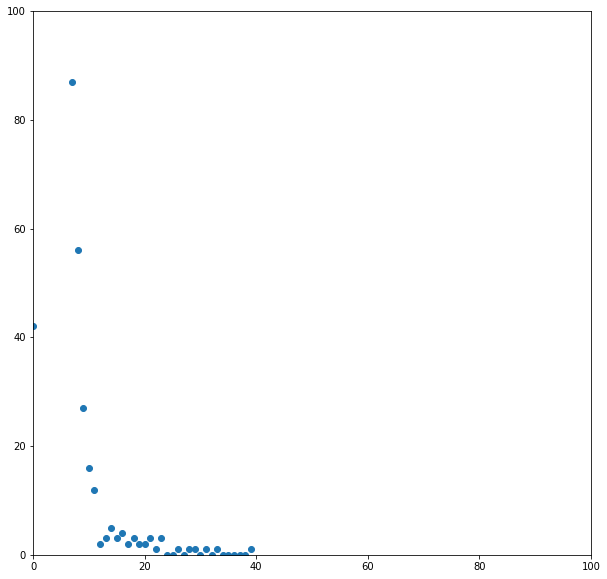

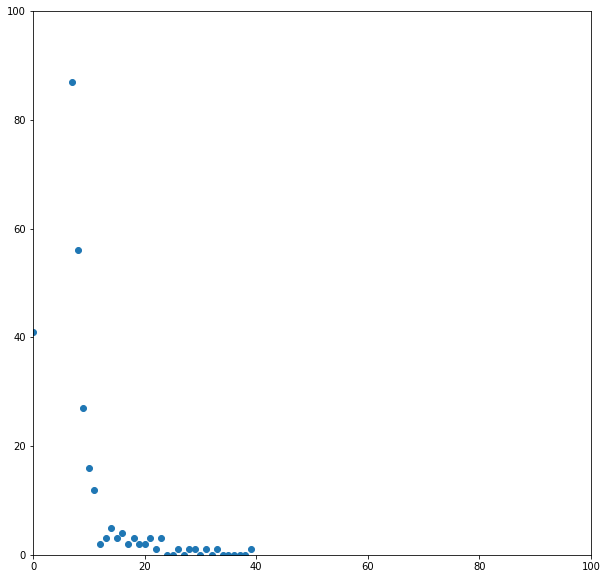

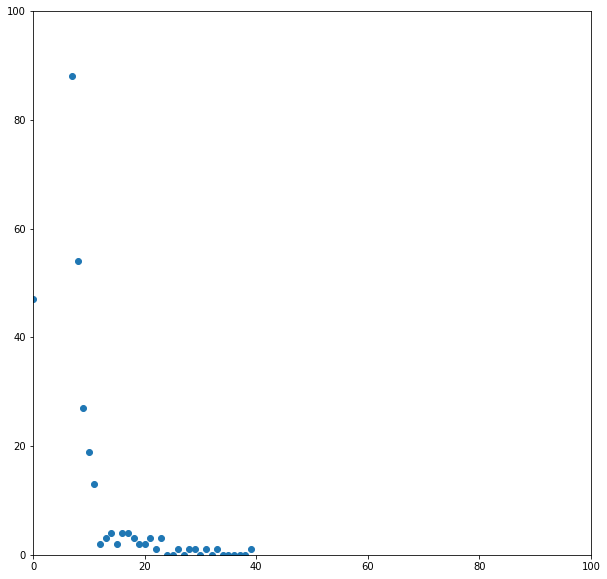

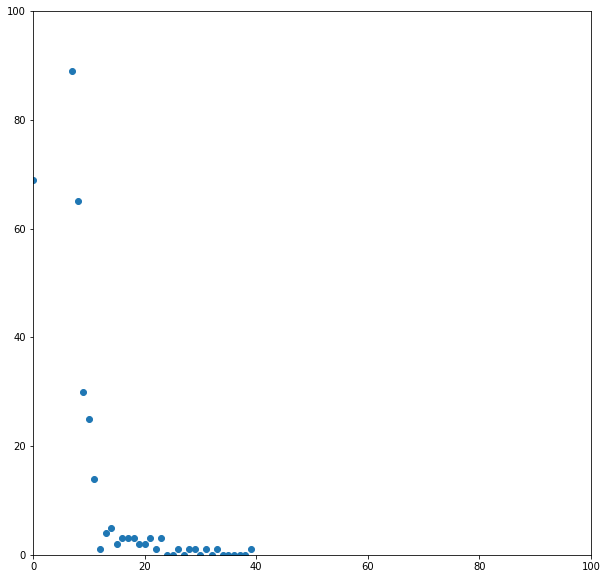

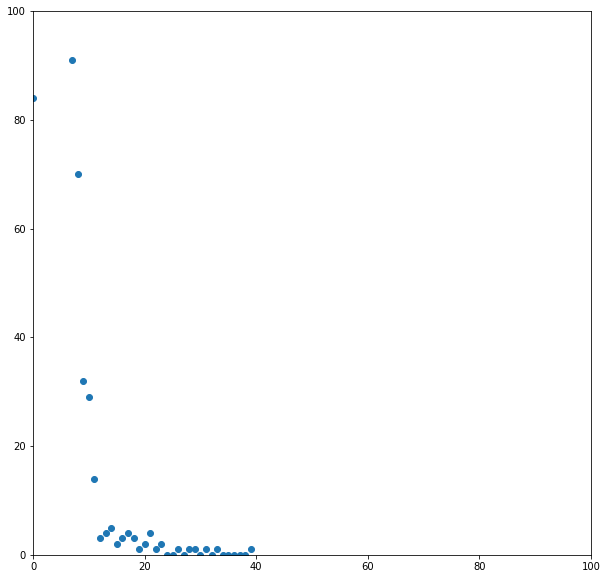

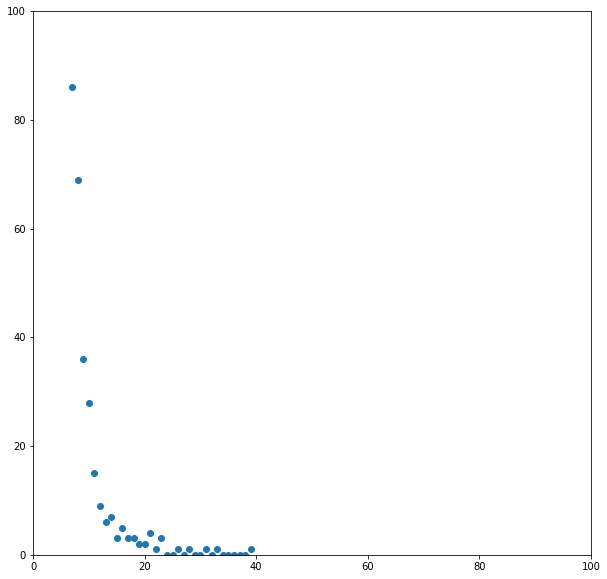

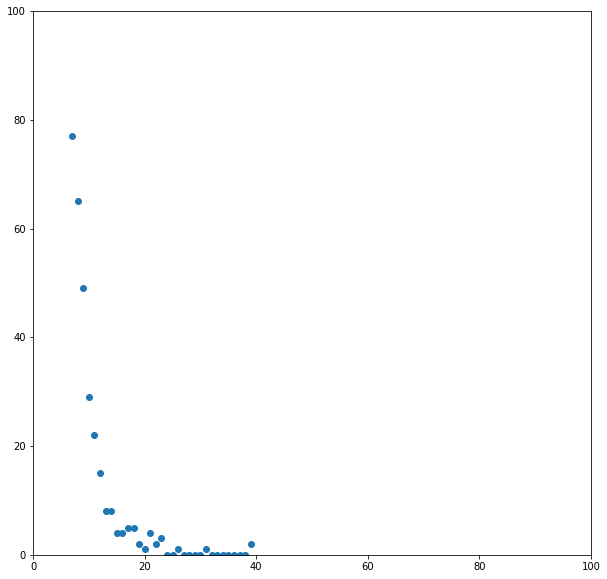

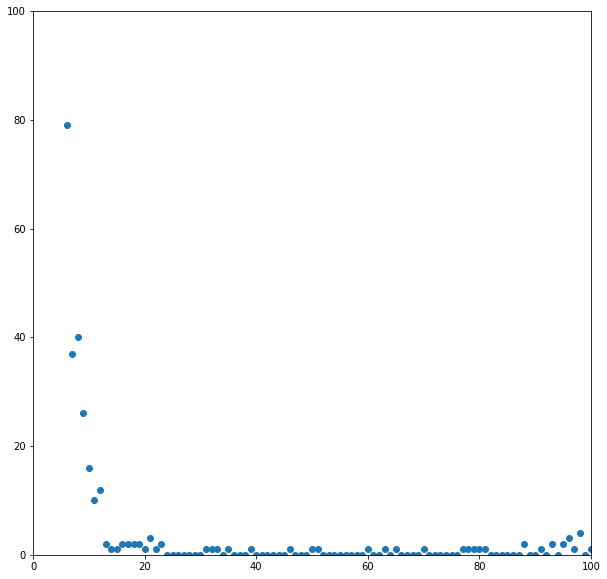

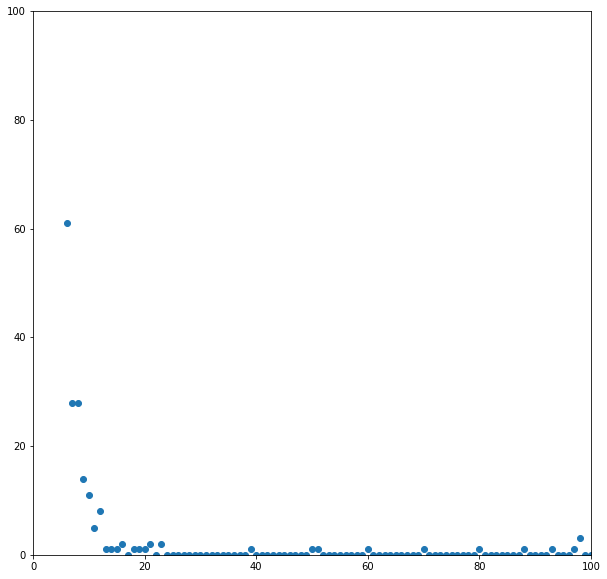

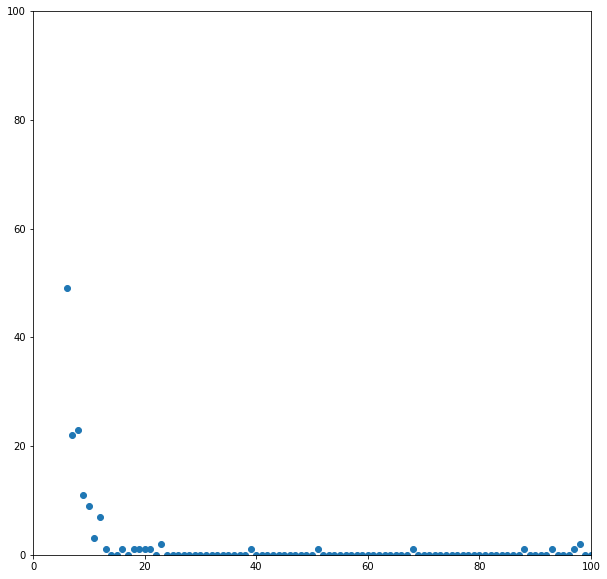

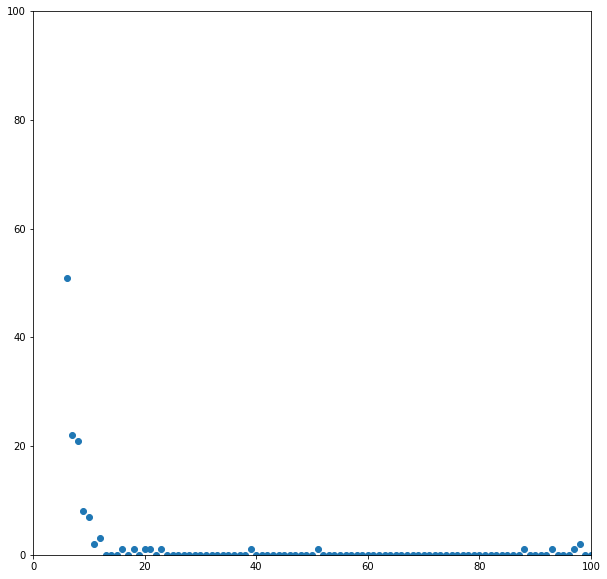

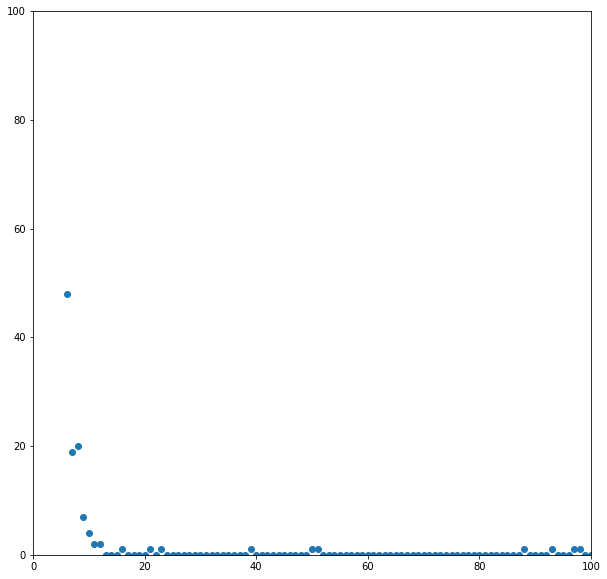

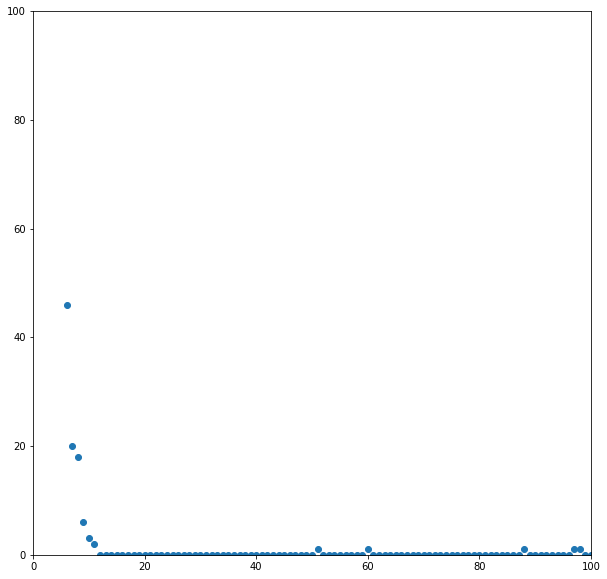

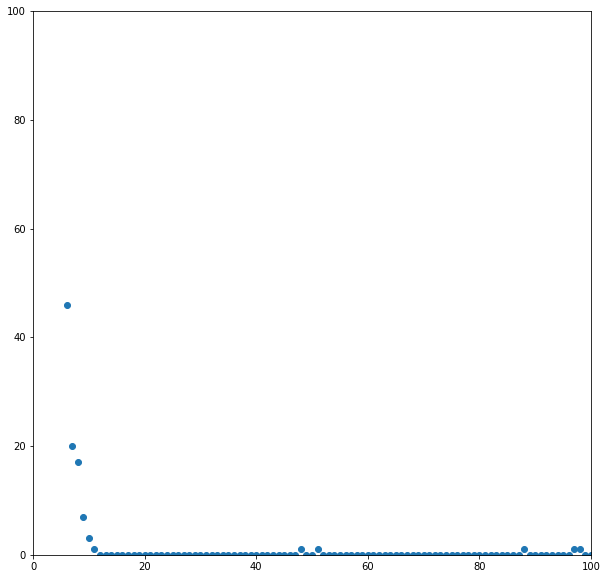

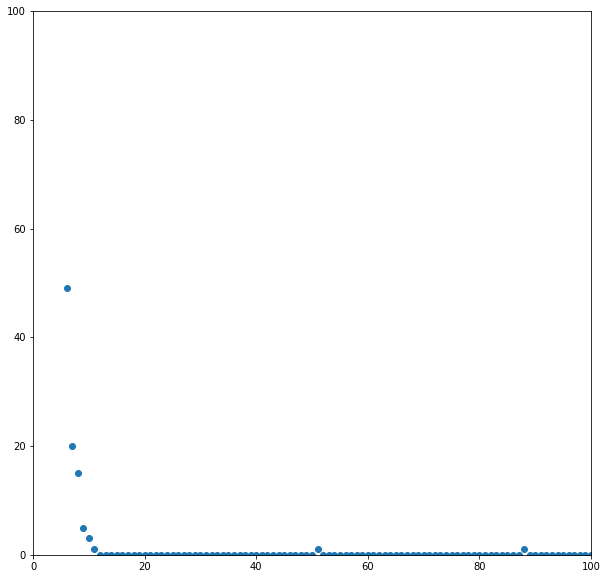

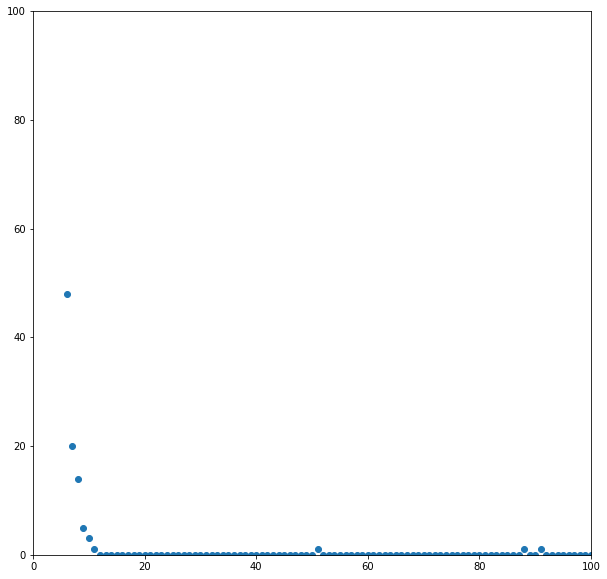

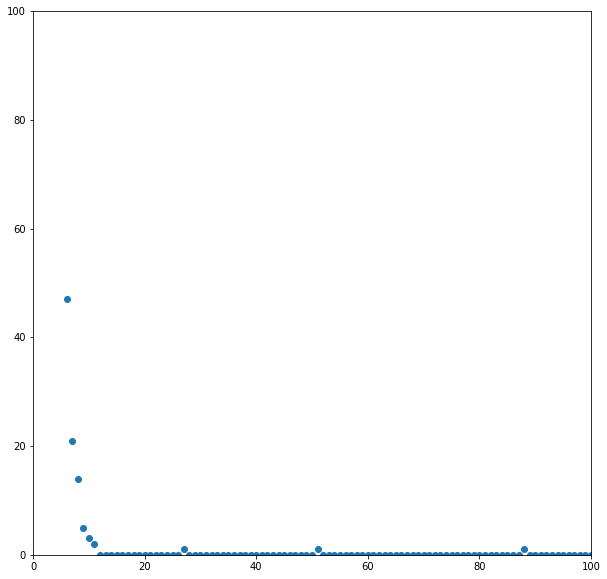

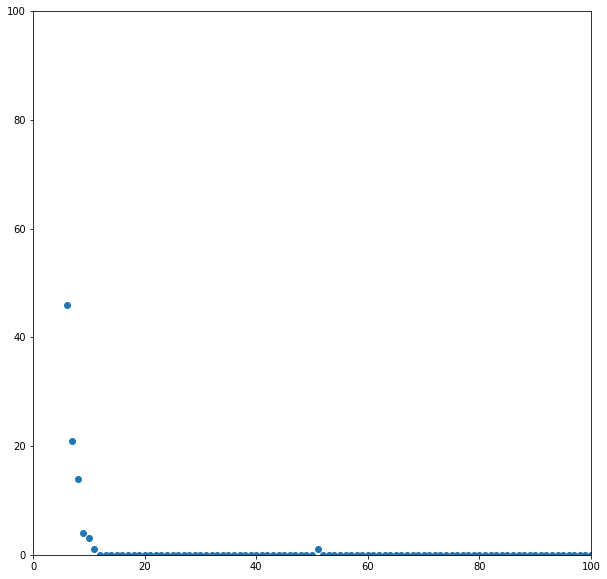

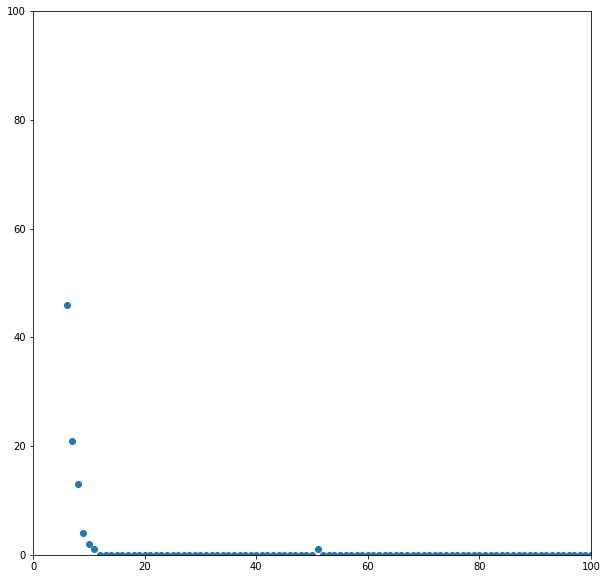

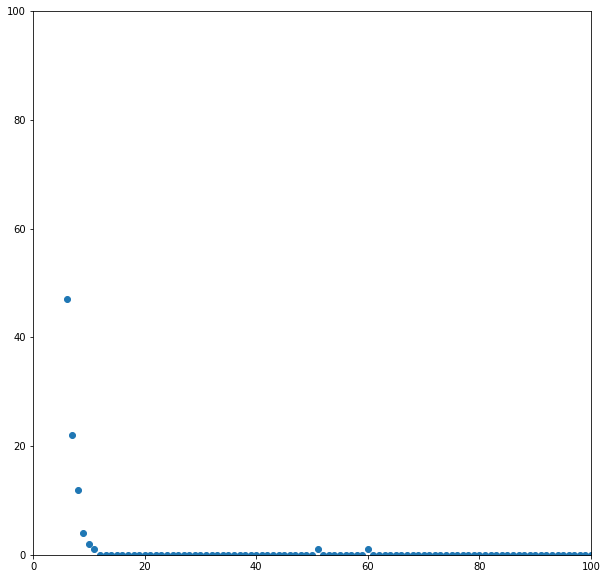

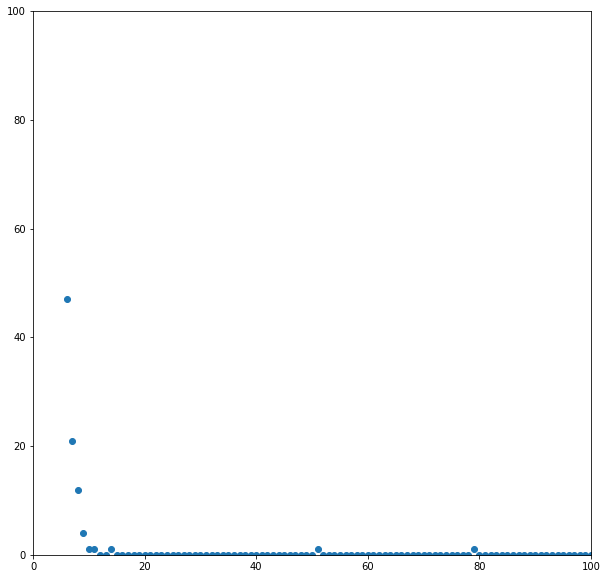

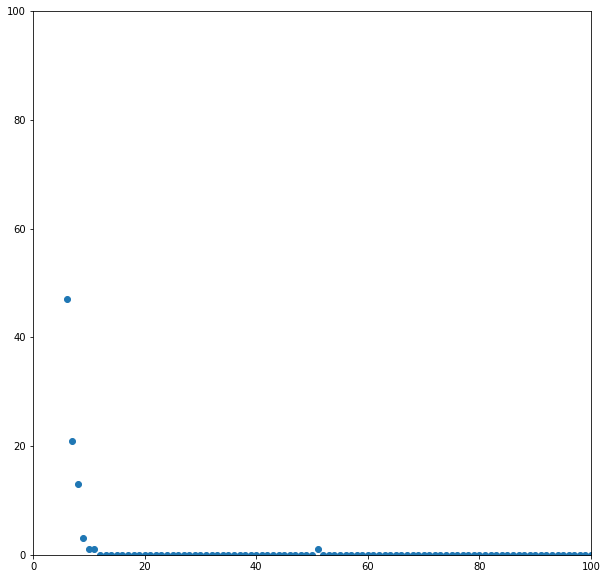

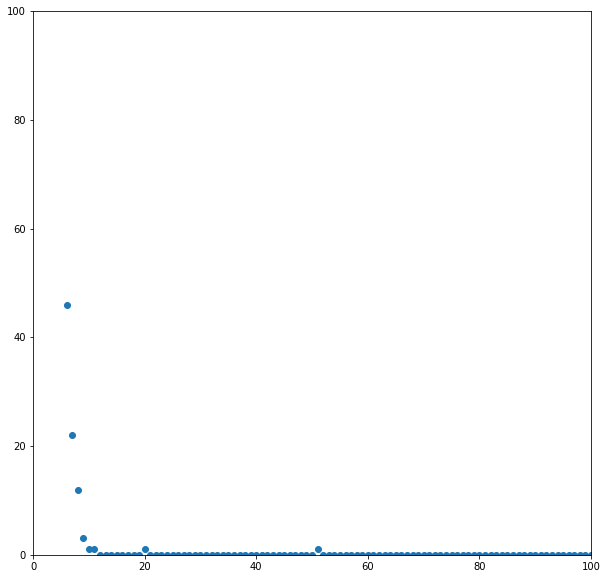

In [16]:
%matplotlib inline
for i,step in enumerate(range(len(data))):
    #step=-1 ###last step is -1, first step is 0
    fig = plt.figure(figsize=(10,10))
    plt.plot(data[step]['dist'][0],data[step]['dist'][1],'o')
    plt.xlim((0,100))
    plt.ylim((0,100))
    #plt.yscale('log')
    #plt.xscale('log')
    
    plt.savefig('/data/kabir/output/SOC_model/dist_plots/'+str(steps[i])+'.png')
    print(i)

Text(0, 0.5, 'Avalanche Size')

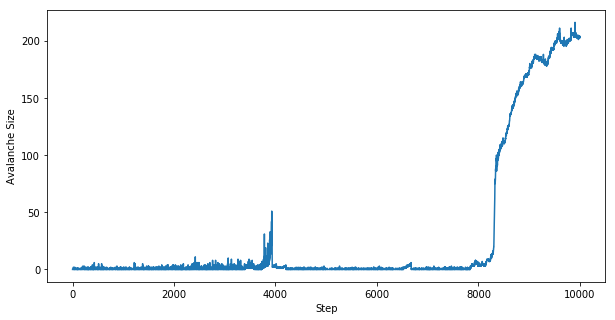

In [188]:
plt.figure(figsize=(10,5))
plt.plot(avalanche_sizes)
plt.xlabel('Step')
plt.ylabel('Avalanche Size')

In [170]:
data[0]['dist']

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 24,  87, 128, 205, 196, 154, 104,  59,  14,  21,   5,   2,   1])]

In [35]:
np.all(data[0]['A']==data[1]['A'])

False

In [13]:
np.all(np.array(['save_distribution'][0])==np.array(p['save_distribution'][-1]))

/home/kabir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


False

In [23]:
np.dot(a[1].flat,a[0].flat)/5000

3.93

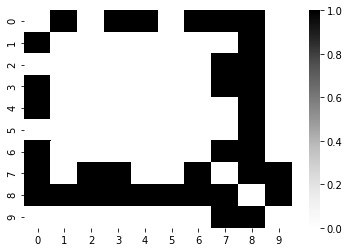

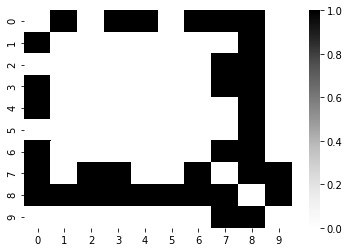

In [37]:
step=50
A=data[step]['A']
fig = plt.figure(figsize=(5, 5))
plt.title("Adjacency Matrix")
#plt.imshow(A,cmap="Greys",interpolation="none")   
%matplotlib inline
sns.heatmap(A, cmap="Greys")
plt.show()

A=data[step+1]['A']
fig = plt.figure(figsize=(5, 5))
plt.title("Adjacency Matrix")
#plt.imshow(A,cmap="Greys",interpolation="none")   
%matplotlib inline
sns.heatmap(A, cmap="Greys")
plt.show()

In [18]:
len(p['save_As'])

10

In [ ]:
clear all

In [81]:
I=np.identity(5)
I[2,2]=0
b=np.ones(5)
np.matmul(I,b>0)

array([1., 1., 0., 1., 1.])

In [82]:
b>0

array([ True,  True,  True,  True,  True])